<center>
    <h1>US Regional Sales</h1>
</center>

# Authors
**Fayaz Shaik** <br>
**Mahesh Maddineni** <br>
**Nathaniel Yee** <br>
**Vivekananda Reddy Pyda** <br>


## About Dataset
This dataset provides comprehensive insights into US regional sales data across different sales channels, including In-Store, Online, Distributor, and Wholesale. This dataset encompasses a wide range of information, from order and product details to sales performance metrics. It offers a comprehensive overview of sales transactions and customer interactions, enabling deep analysis of sales patterns, trends, and potential opportunities.

## Columns in the dataset:

**OrderNumber:** A unique identifier for each order. <br>
**Sales Channel:** The channel through which the sale was made (In-Store, Online, Distributor, Wholesale). <br>
**WarehouseCode:** Code representing the warehouse involved in the order. <br>
**ProcuredDate:** Date when the products were procured. <br>
**OrderDate:** Date when the order was placed. <br>
**ShipDate:** Date when the order was shipped. <br>
**DeliveryDate:** Date when the order was delivered. <br>
**SalesTeamID:** Identifier for the sales team involved. <br>
**CustomerID:** Identifier for the customer. <br>
**StoreID:** Identifier for the store. <br>
**ProductID:** Identifier for the product. <br>
**Order Quantity:** Quantity of products ordered. <br>
**Discount Applied:** Applied discount for the order. <br>
**Unit Cost:** Cost of a single unit of the product. <br>
**Unit Price:** Price at which the product was sold. <br> <br>
This dataset serves as a valuable resource for analysing sales trends, identifying popular products, assessing the performance of different sales channels, and optimising pricing strategies for different regions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")
us_sales_data.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate   
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18  \
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID   
0      19/6/18          USD             6           15       259          12  \
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied Unit Cost Unit Price  
0               5             0.075  1,001.18   1,963.10  
1               3             0.075  3,348.66   3,939.60  
2               1             0.050    781.22   1,775.50  
3               8             0.075  1,464.69   2,324.90  
4               8             0.100  1,476.14   1,822.40

# Data Inspection

In [3]:
us_sales_data.info(verbose=None, buf=None, max_cols=None, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [4]:
us_sales_data.describe()

_SalesTeamID  _CustomerID     _StoreID   _ProductID  Order Quantity   
count   7991.000000  7991.000000  7991.000000  7991.000000     7991.000000  \
mean      14.384307    25.457014   183.850081    23.771743        4.525341   
std        7.986086    14.414883   105.903946    13.526545        2.312631   
min        1.000000     1.000000     1.000000     1.000000        1.000000   
25%        8.000000    13.000000    91.000000    12.000000        3.000000   
50%       14.000000    25.000000   183.000000    24.000000        5.000000   
75%       21.000000    38.000000   276.000000    36.000000        7.000000   
max       28.000000    50.000000   367.000000    47.000000        8.000000   

       Discount Applied  
count       7991.000000  
mean           0.114394  
std            0.085570  
min            0.050000  
25%            0.050000  
50%            0.075000  
75%            0.150000  
max            0.400000

In [5]:
# Missing Values
for column in us_sales_data:
    print(f"{column} : {us_sales_data[column].isna().sum()}")

OrderNumber : 0
Sales Channel : 0
WarehouseCode : 0
ProcuredDate : 0
OrderDate : 0
ShipDate : 0
DeliveryDate : 0
CurrencyCode : 0
_SalesTeamID : 0
_CustomerID : 0
_StoreID : 0
_ProductID : 0
Order Quantity : 0
Discount Applied : 0
Unit Cost : 0
Unit Price : 0


In [6]:
# Duplicate Data
dups = us_sales_data[us_sales_data.duplicated() == True]
dups

Empty DataFrame
Columns: [OrderNumber, Sales Channel, WarehouseCode, ProcuredDate, OrderDate, ShipDate, DeliveryDate, CurrencyCode, _SalesTeamID, _CustomerID, _StoreID, _ProductID, Order Quantity, Discount Applied, Unit Cost, Unit Price]
Index: []

In [7]:
#Coverting data type of Unit Cost, Unit Price from string to float
price_columns_list = ["Unit Cost", "Unit Price"]
for column in price_columns_list:
    us_sales_data[column] = us_sales_data[column].str.replace(',', '').astype(float)

### Deriving new features

In [8]:
us_sales_data['DaysToShip'] = (pd.to_datetime(us_sales_data['ShipDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['OrderDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')
us_sales_data['DaysToShip'].describe()

count    7991.000000
mean       15.168940
std         7.793951
min         2.000000
25%         8.000000
50%        15.000000
75%        22.000000
max        28.000000
Name: DaysToShip, dtype: float64

In [9]:
# Checking for invalid data
daysToShip = np.array(us_sales_data['DaysToShip'])
daysToShip[daysToShip < 0]

array([], dtype=float64)

In [10]:
us_sales_data['DaysToDeliver'] = (pd.to_datetime(us_sales_data['DeliveryDate'],format = '%d/%m/%y') - pd.to_datetime(us_sales_data['ShipDate'], format = '%d/%m/%y')) / np.timedelta64(1, 'D')
us_sales_data['DaysToDeliver'].describe()

count    7991.000000
mean        5.503942
std         2.855809
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: DaysToDeliver, dtype: float64

In [11]:
# Checking for invalid data
daysToDeliver = np.array(us_sales_data['DaysToDeliver'])
daysToDeliver[daysToDeliver < 0]

array([], dtype=float64)

In [12]:
us_sales_data['Total Sales'] = us_sales_data['Order Quantity'] * us_sales_data['Unit Price'] * (1 - us_sales_data['Discount Applied'])

In [13]:
us_sales_data['Profit'] = (us_sales_data['Unit Price'] - us_sales_data['Unit Cost'] - (us_sales_data['Unit Price'] * us_sales_data['Discount Applied'])) * us_sales_data['Order Quantity']
us_sales_data['Profit'].describe()

count     7991.000000
mean      2668.666107
std       3416.705214
min     -12167.200000
25%        498.050000
50%       1544.265000
75%       3522.860000
max      26384.600000
Name: Profit, dtype: float64

### Analysis of each sales channel

In [14]:
in_store_data = us_sales_data[us_sales_data['Sales Channel']=='In-Store']
in_store_data.describe()

_SalesTeamID  _CustomerID     _StoreID   _ProductID  Order Quantity   
count   3298.000000  3298.000000  3298.000000  3298.000000     3298.000000  \
mean       6.302001    25.402668   185.039418    23.779563        4.511219   
std        3.333873    14.452638   106.432261    13.517294        2.282457   
min        1.000000     1.000000     1.000000     1.000000        1.000000   
25%        3.000000    13.000000    91.000000    12.000000        3.000000   
50%        6.000000    25.000000   186.000000    24.000000        4.000000   
75%        9.000000    38.000000   278.000000    35.750000        7.000000   
max       12.000000    50.000000   367.000000    47.000000        8.000000   

       Discount Applied    Unit Cost   Unit Price   DaysToShip  DaysToDeliver   
count       3298.000000  3298.000000  3298.000000  3298.000000    3298.000000  \
mean           0.113834  1424.761516  2270.215161    15.077926       5.436022   
std            0.084553  1106.697197  1665.393094     7.787420       2.830410   
min            0.050000    68.680000   167.500000     2.000000       1.000000   
25%            0.050000   610.235000  1031.800000     8.000000       3.000000   
50%            0.075000  1083.255000  1839.150000    15.000000       5.000000   
75%            0.150000  2020.602500  3522.525000    22.000000       8.000000   
max            0.400000  5288.510000  6559.300000    28.000000      10.000000   

        Total Sales        Profit  
count   3298.000000   3298.000000  
mean    9127.624225   2667.632879  
std     8863.201226   3412.796178  
min      100.500000 -12167.200000  
25%     2813.748750    489.943125  
50%     6046.415000   1516.540000  
75%    13059.472500   3589.162500  
max    49697.920000  24722.180000

In [15]:
online_data = us_sales_data[us_sales_data['Sales Channel']=='Online']
online_data.describe()

_SalesTeamID  _CustomerID     _StoreID   _ProductID  Order Quantity   
count   2425.000000  2425.000000  2425.000000  2425.000000     2425.000000  \
mean      16.099381    25.671340   181.110103    23.548041        4.493608   
std        2.442663    14.315358   106.108913    13.590952        2.333582   
min       12.000000     1.000000     1.000000     1.000000        1.000000   
25%       14.000000    13.000000    87.000000    12.000000        2.000000   
50%       16.000000    26.000000   180.000000    23.000000        4.000000   
75%       18.000000    38.000000   275.000000    35.000000        7.000000   
max       20.000000    50.000000   367.000000    47.000000        8.000000   

       Discount Applied    Unit Cost   Unit Price   DaysToShip  DaysToDeliver   
count       2425.000000  2425.000000  2425.000000  2425.000000    2425.000000  \
mean           0.116443  1434.802256  2286.534557    15.327010       5.546804   
std            0.087950  1106.467508  1655.582776     7.813568       2.871343   
min            0.050000    69.680000   167.500000     2.000000       1.000000   
25%            0.050000   606.220000  1025.100000     9.000000       3.000000   
50%            0.075000  1091.970000  1869.300000    15.000000       5.000000   
75%            0.150000  2037.810000  3564.400000    22.000000       8.000000   
max            0.400000  5498.560000  6559.300000    28.000000      10.000000   

        Total Sales        Profit  
count   2425.000000   2425.000000  
mean    8947.859325   2543.016785  
std     8595.965331   3236.389258  
min      100.500000  -7868.420000  
25%     2881.837500    509.535000  
50%     6073.550000   1502.670000  
75%    12157.150000   3356.700000  
max    48119.400000  24748.160000

In [16]:
distributor_data = us_sales_data[us_sales_data['Sales Channel']=='Distributor']
distributor_data.describe()

_SalesTeamID  _CustomerID     _StoreID   _ProductID  Order Quantity   
count   1375.000000  1375.000000  1375.000000  1375.000000     1375.000000  \
mean      22.698182    25.290909   186.717091    24.167273        4.572364   
std        1.468184    14.479912   106.173134    13.391907        2.333315   
min       20.000000     1.000000     1.000000     1.000000        1.000000   
25%       21.000000    12.500000    95.000000    13.000000        3.000000   
50%       23.000000    25.000000   186.000000    24.000000        5.000000   
75%       24.000000    38.000000   281.000000    36.000000        7.000000   
max       25.000000    50.000000   367.000000    47.000000        8.000000   

       Discount Applied    Unit Cost   Unit Price   DaysToShip  DaysToDeliver   
count       1375.000000  1375.000000  1375.000000  1375.000000    1375.000000  \
mean           0.112909  1456.117055  2328.554545    15.252364       5.619636   
std            0.084764  1140.809802  1727.015022     7.869636       2.872354   
min            0.050000    70.350000   167.500000     2.000000       1.000000   
25%            0.050000   611.645000  1031.800000     8.000000       3.000000   
50%            0.075000  1071.730000  1855.900000    16.000000       6.000000   
75%            0.150000  2089.030000  3819.000000    22.000000       8.000000   
max            0.400000  5399.730000  6566.000000    28.000000      10.000000   

        Total Sales        Profit  
count   1375.000000   1375.000000  
mean    9577.561925   2827.561736  
std     9561.863244   3591.706950  
min      134.000000  -4034.310000  
25%     2672.965000    496.892500  
50%     6287.280000   1631.730000  
75%    13872.015000   3739.800000  
max    49035.960000  26384.600000

In [17]:
wholesale_data = us_sales_data[us_sales_data['Sales Channel']=='Wholesale']
wholesale_data.describe()

_SalesTeamID  _CustomerID    _StoreID  _ProductID  Order Quantity   
count    893.000000   893.000000  893.000000  893.000000      893.000000  \
mean      26.774916    25.331467  182.483763   23.741321        4.591265   
std        0.948067    14.461712  102.919975   13.600203        2.335583   
min       25.000000     1.000000    1.000000    1.000000        1.000000   
25%       26.000000    12.000000   92.000000   12.000000        3.000000   
50%       27.000000    26.000000  178.000000   24.000000        5.000000   
75%       28.000000    38.000000  270.000000   36.000000        7.000000   
max       28.000000    50.000000  366.000000   47.000000        8.000000   

       Discount Applied    Unit Cost   Unit Price  DaysToShip  DaysToDeliver   
count        893.000000   893.000000   893.000000  893.000000     893.000000  \
mean           0.113186  1413.197088  2264.224860   14.947368       5.460246   
std            0.084018  1106.496249  1666.007675    7.649154       2.878293   
min            0.050000    70.350000   167.500000    2.000000       1.000000   
25%            0.050000   584.310000  1031.800000    9.000000       3.000000   
50%            0.075000  1062.150000  1855.900000   15.000000       5.000000   
75%            0.150000  2006.780000  3551.000000   21.000000       8.000000   
max            0.400000  5489.980000  6559.300000   28.000000      10.000000   

        Total Sales        Profit  
count    893.000000    893.000000  
mean    9152.036439   2769.030840  
std     8972.614034   3618.109863  
min      159.125000  -9888.640000  
25%     2806.965000    501.327500  
50%     6296.660000   1659.480000  
75%    12831.840000   3467.250000  
max    47894.280000  23552.360000

# Visulaization

### Sales Channel Order Trends Yearly

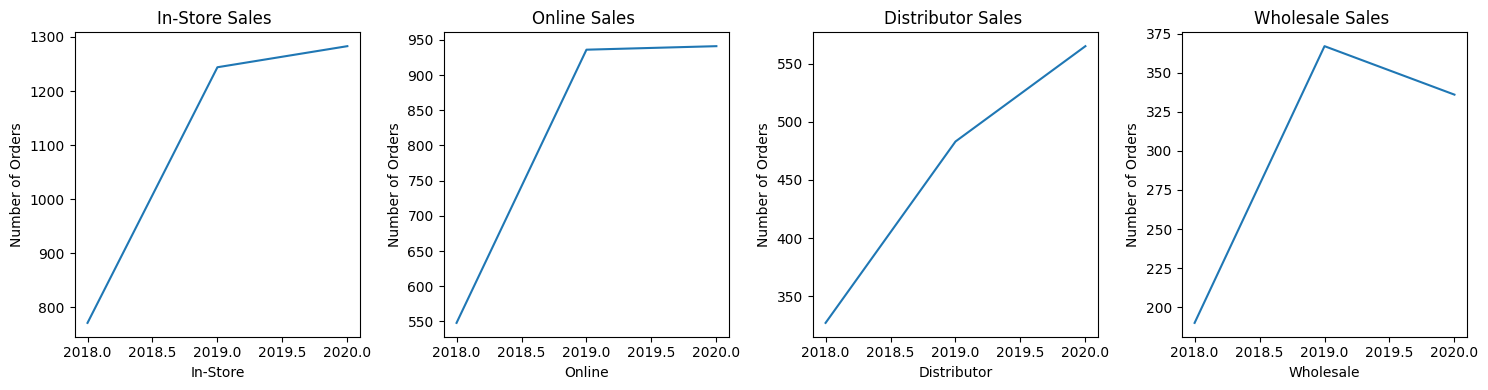

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
us_sales_data['OrderDate'] = pd.to_datetime(us_sales_data['OrderDate'],format = '%d/%m/%y')
us_sales_data["OrderYear"] = us_sales_data['OrderDate'].dt.year
for i, channel in enumerate(us_sales_data['Sales Channel'].unique()):
    count = []
    dummy = pd.DataFrame(us_sales_data[us_sales_data["Sales Channel"] == channel])
    count.append(dummy[dummy['OrderYear'] == 2018].shape[0])
    count.append(dummy[dummy['OrderYear'] == 2019].shape[0])
    count.append(dummy[dummy['OrderYear'] == 2020].shape[0])
    ax[i].plot(us_sales_data["OrderYear"].unique(), count)
    ax[i].set_title(f"{channel} Sales ")
    ax[i].set_ylabel("Number of Orders")
    ax[i].set_xlabel(f"{channel}")

# Adjust layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

Until 2019, all sales channels showed a clear pattern of increasing performance. However, in the subsequent year, 2020, the growth continued but at a slower rate, and the wholesale sector consistently saw a decrease in performance.

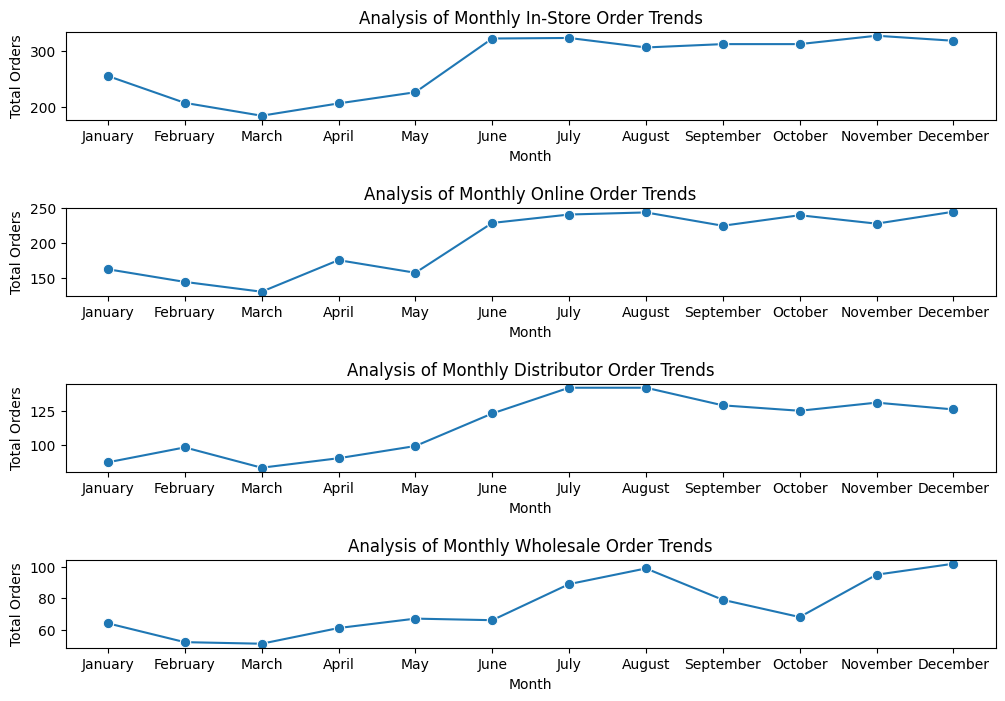

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [19]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
fig.subplots_adjust(wspace=0.5, hspace=1)
for i, channel in enumerate(us_sales_data['Sales Channel'].unique()):
    monthly_trend = pd.DataFrame(us_sales_data[us_sales_data["Sales Channel"] == channel])
    monthly_trend['OrderDate'] = monthly_trend['OrderDate'].dt.month_name()
    monthly_trend = monthly_trend['OrderDate'].value_counts().reset_index()
    monthly_trend = monthly_trend.rename(columns={'OrderDate':'Month', 'count':'Total Orders'})
    monthly_trend = monthly_trend.sort_values(by='Month')
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthly_trend['Month'] = pd.Categorical(monthly_trend['Month'], categories=month_order, ordered=True)
    monthly_trend = monthly_trend.sort_values(by='Month')
    fig = plt.figure(figsize=(12, 4))
    sns.lineplot(data   = monthly_trend,
                 x      = "Month",
                 y      = "Total Orders",
                 marker = '.',
                 ax     = ax[i],
                 markersize = 15,
                 legend = False
                )
    ax[i].set_title(f"Analysis of Monthly {channel} Order Trends")
plt.tight_layout()
plt.show()

Despite the oscillations in the graph, it is evident that March consistently has the lowest number of orders, while December consistently records the highest number of orders, with the exception of the distributor category, which experiences peak orders in July and August.

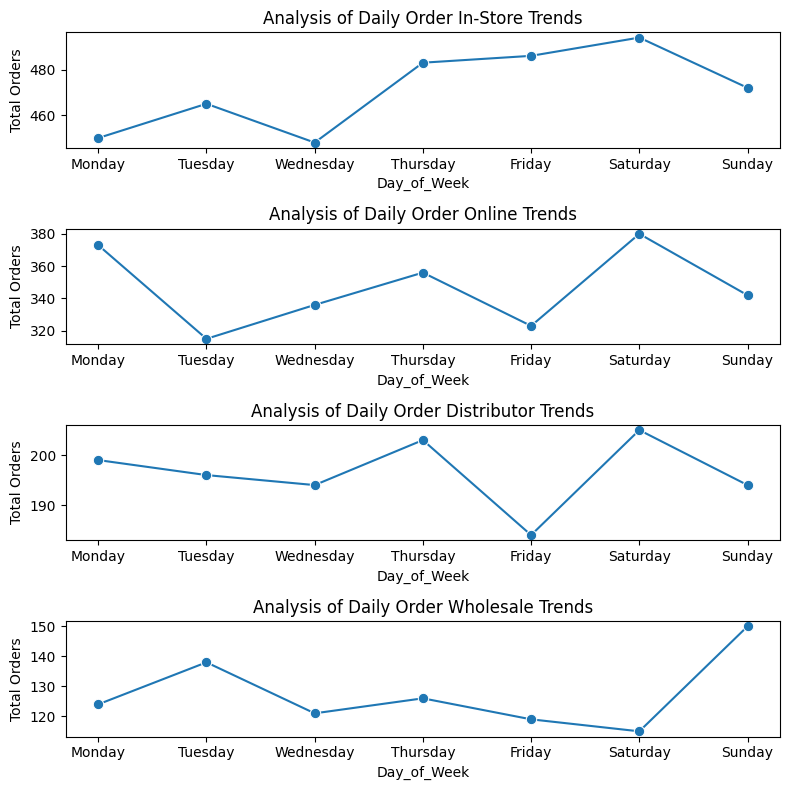

In [20]:
fig, ax = plt.subplots(4, 1, figsize=(8, 8))
for i, channel in enumerate(us_sales_data['Sales Channel'].unique()):
    daily_trend = pd.DataFrame(us_sales_data[us_sales_data["Sales Channel"] == channel])
    daily_trend['OrderDate'] = daily_trend['OrderDate'].dt.day_name()
    daily_trend = daily_trend['OrderDate'].value_counts().reset_index()
    daily_trend = daily_trend.rename(columns={'OrderDate':'Day_of_Week', 'count':'Total Orders'})
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_trend['Day_of_Week'] = pd.Categorical(daily_trend['Day_of_Week'], categories=day_order, ordered=True)
    daily_trend = daily_trend.sort_values(by='Day_of_Week')
    sns.lineplot(data   = daily_trend,
                 x      = daily_trend.loc[:, "Day_of_Week"],
                 y      = daily_trend['Total Orders'],
                 marker = '.',
                 ax = ax[i],
                 markersize = 15,
                 legend = False
                )
    ax[i].set_title(f"Analysis of Daily Order {channel} Trends")
plt.tight_layout()
plt.show()

Throughout the week, there is a fluctuating pattern in trends for all sales channels. Saturdays tend to be the busiest, with the exception of the wholesale sector, where Saturdays are the least active, and Sundays emerge as the most active day.

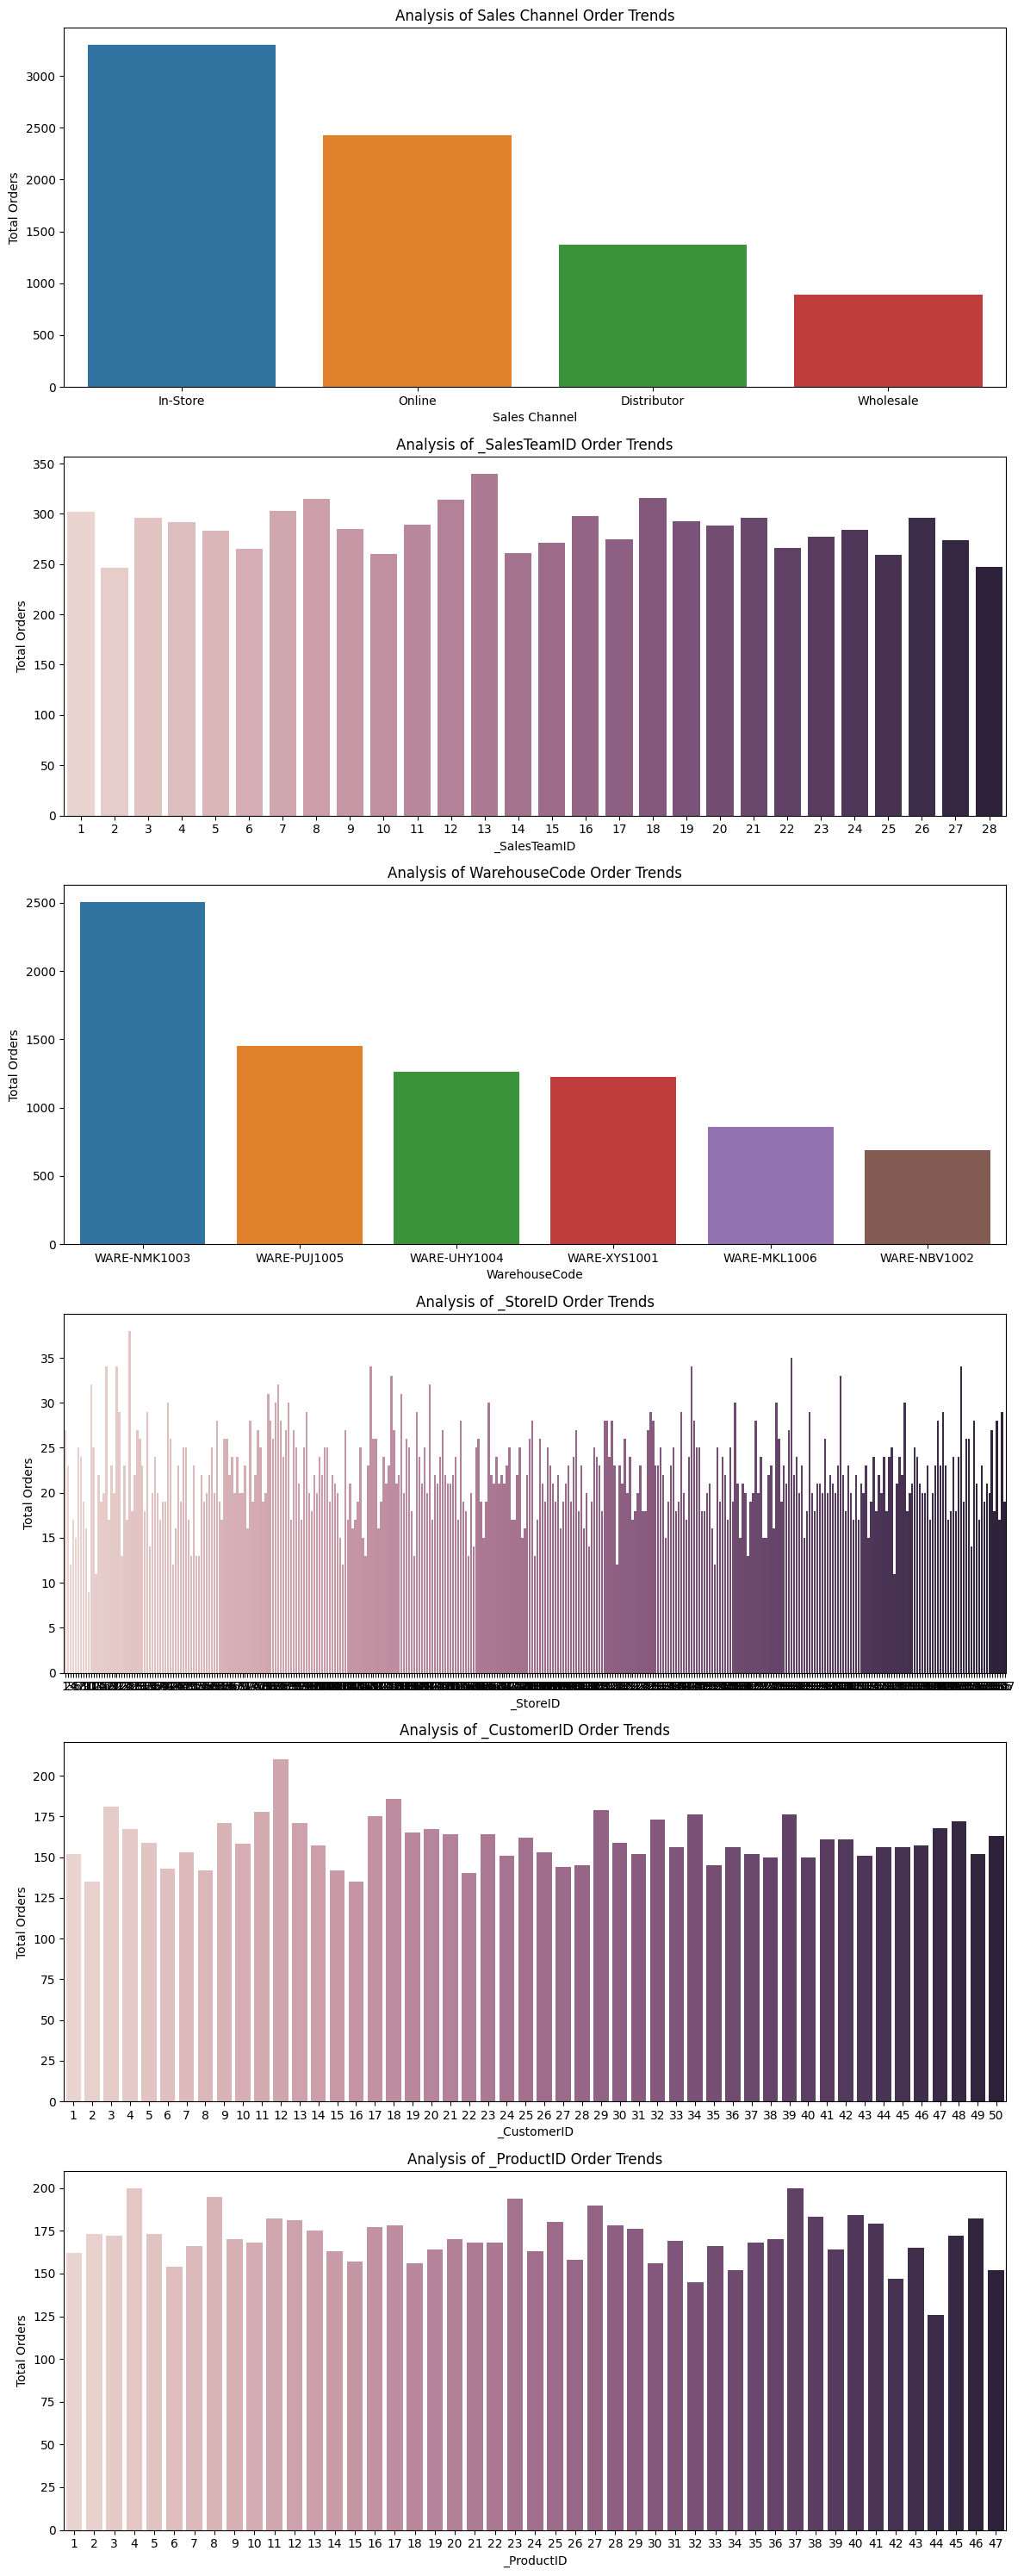

In [21]:
features = ["Sales Channel", "_SalesTeamID", "WarehouseCode", "_StoreID", "_CustomerID", "_ProductID"]
fig, ax = plt.subplots(6, 1, figsize=(12, 30))
for i, feature in enumerate(features):
    orders = pd.DataFrame(us_sales_data[feature].value_counts().reset_index())
    orders = orders.rename(columns={'count':'Total Orders'})
    
    sns.barplot(data   = orders,
                x      = feature,
                y      = 'Total Orders',
                hue    = feature,
                ax = ax[i],
                legend = False
                )
    ax[i].set_title(f"Analysis of {feature} Order Trends")
plt.tight_layout()
plt.show()

The bar plots illustrate the total number of orders placed and categorize them based on the following features: Sales Channel, Sales Team ID, Warehouse Code, Store ID, Customer ID, and Product ID.

### Frequency of sales across the sales channels

<Axes: >

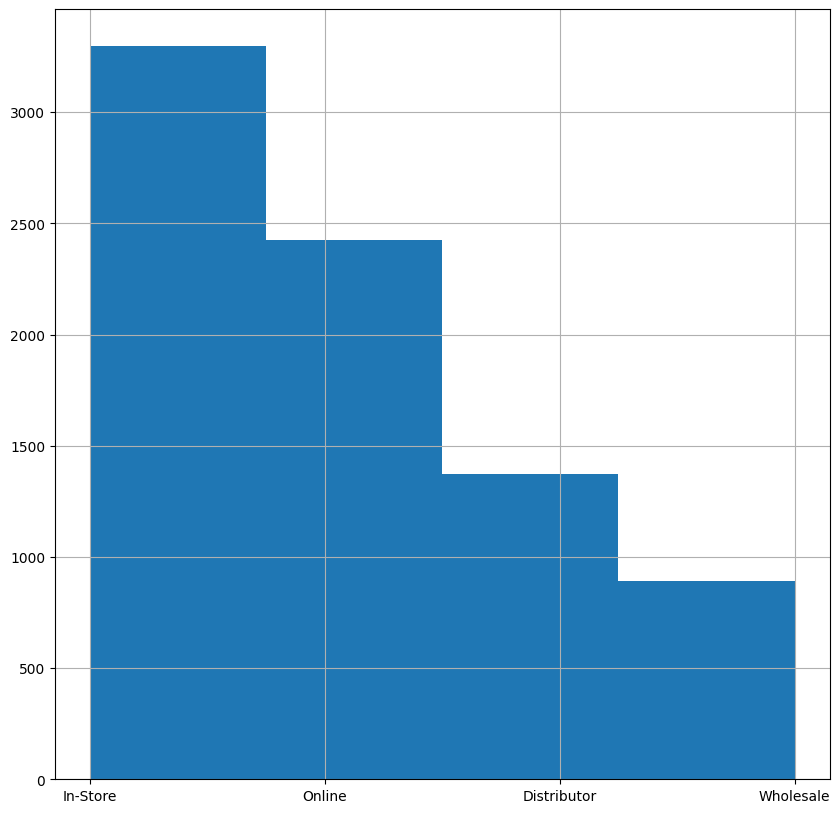

In [22]:
# split the data into subsets of each sales channel
instore_data = us_sales_data[us_sales_data['Sales Channel'] == 'In-Store']
online_data = us_sales_data[us_sales_data['Sales Channel'] == 'Online']
distributor_data = us_sales_data[us_sales_data['Sales Channel'] == 'Distributor']
wholesale_data = us_sales_data[us_sales_data['Sales Channel'] == 'Wholesale']

# visualize the frequency of each channel's usage (raw data)
us_sales_data['Sales Channel'].hist(bins=4, figsize=(10, 10))

As we can see from the raw data, in-store seems to be used most frequently for purchasing products.
Online is used less frequently than in-store. By Distributor is less than online, and by Wholesale is even less.

However, these frequencies do not take into account the following:
    Which customers use which channel for frequently and when
    Which sales team is responsible for this sale
    The quality of shipping dates
    Total Profit from each purchase
    etc.

These will need to be taken into account as well as correlating data to see if certain variables (such as sales team) have an impact on the sales.

### Customer Frequency across the four channes (some data may be hidden)

In [23]:
instore_data.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'DaysToShip',
       'DaysToDeliver', 'Total Sales', 'Profit', 'OrderYear'],
      dtype='object')

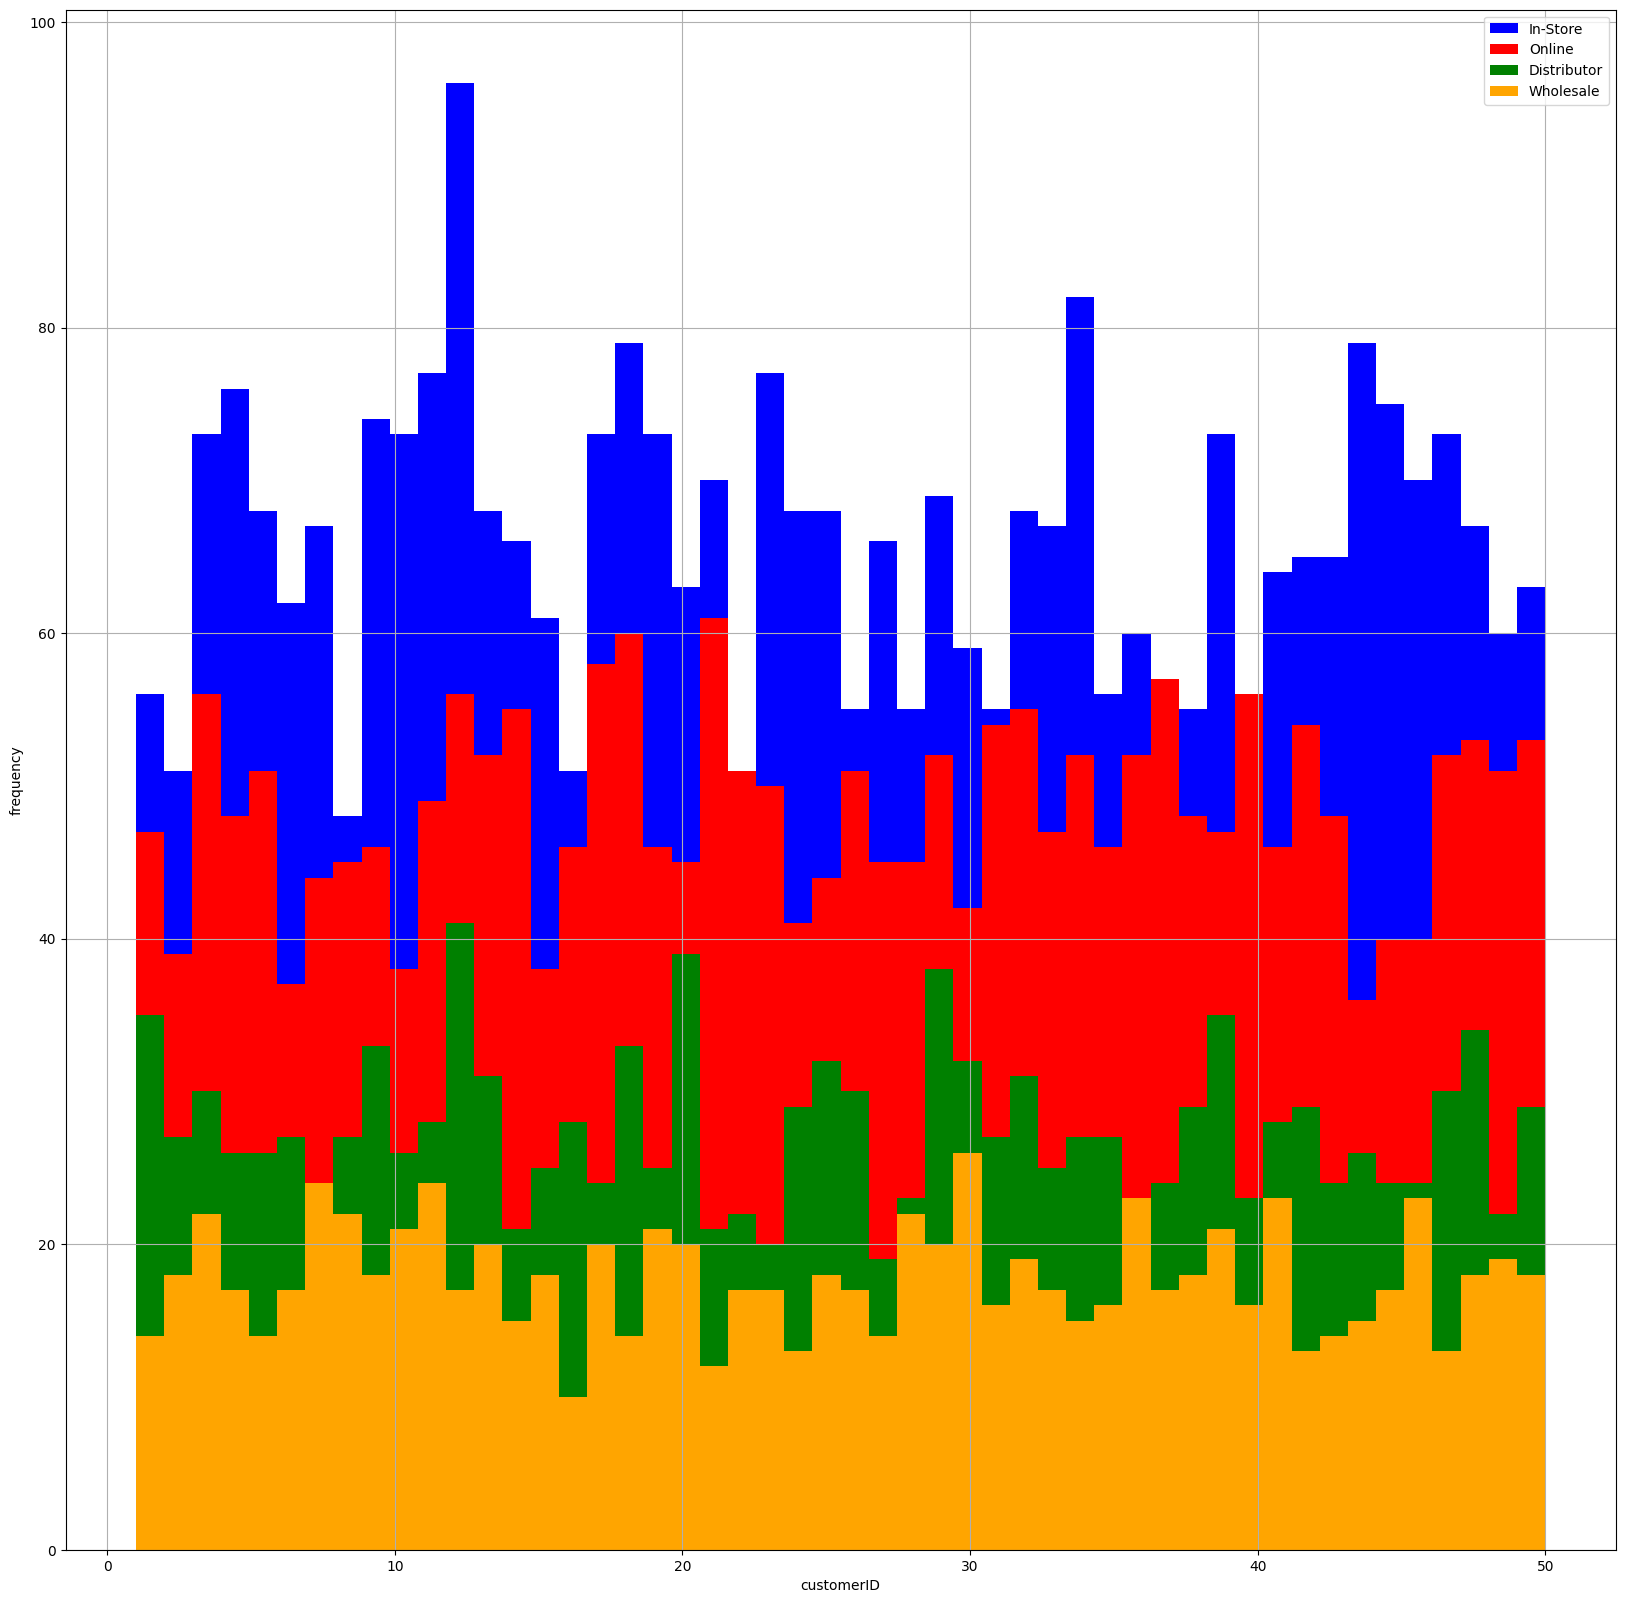

In [24]:
# Customer Frequency Chart

# variables to manually change plot size
x_size = 20
y_size = 20

# plot every customerID with each sales channel
instore_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='blue')
online_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='red')
distributor_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='green')
wholesale_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='orange')
plt.xlabel("customerID")
plt.ylabel("frequency")
plt.legend(labels=["In-Store", "Online", "Distributor", "Wholesale"])
plt.show()

In this graph
x = customerID
y = frequency

As we can see here, most customers seem consistent their frequency with each channel.
However, some data may potentially be covered. (For instance, if a customer were to use online more than in-store, the red data would cover the blue in this graph.)

While more cross-referencing is necessary, we can safely assume that overall the frequency of each customer is highly correlated with the frequency of channel usage.

Profit can be used to determine the net gain for each purchase.

This is all I have as of right now. Feel free to use whatever code or data here for comparison if you need.

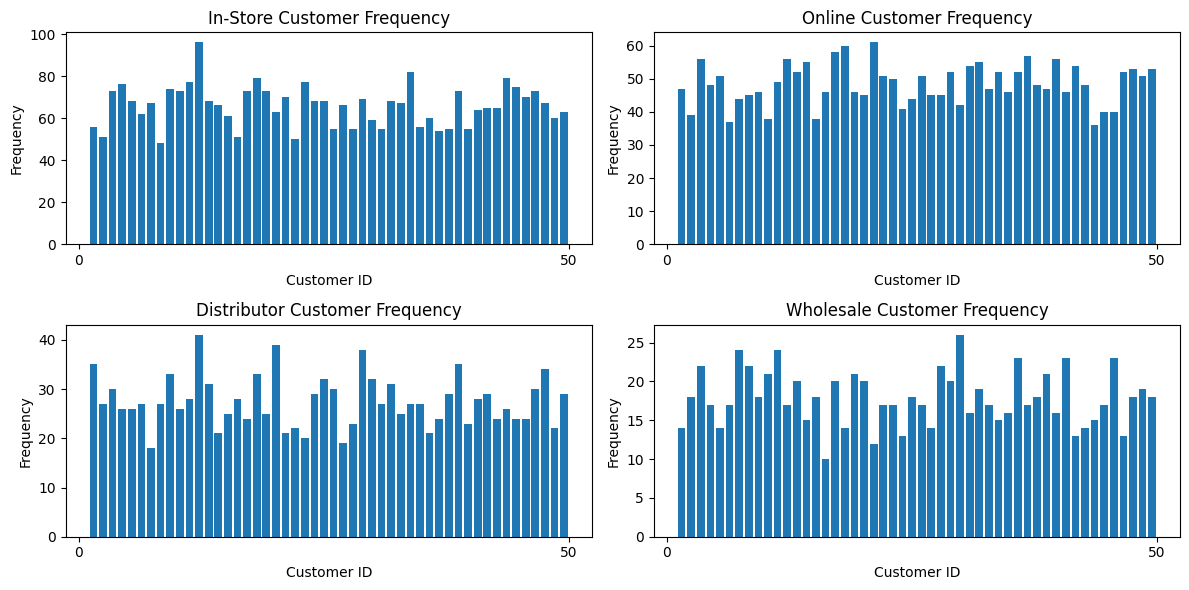

In [25]:
# Show the four different sales channel frequencies

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))


axes[0][0].hist(instore_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[0][0].set_title('In-Store Customer Frequency')
axes[0][0].set_xticks([0, 50])
#axes[0].set_xticklabels(['0', '1'])
axes[0][0].set_xlabel('Customer ID')
axes[0][0].set_ylabel('Frequency')


axes[0][1].hist(online_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[0][1].set_title('Online Customer Frequency')
axes[0][1].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[0][1].set_xlabel('Customer ID')
axes[0][1].set_ylabel('Frequency')

axes[1][0].hist(distributor_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[1][0].set_title('Distributor Customer Frequency')
axes[1][0].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[1][0].set_xlabel('Customer ID')
axes[1][0].set_ylabel('Frequency')

axes[1][1].hist(wholesale_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[1][1].set_title('Wholesale Customer Frequency')
axes[1][1].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[1][1].set_xlabel('Customer ID')
axes[1][1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Once again, we can confirm the information above about which channels are used more frequently.
It is still possible that some customers use certain channels more frequently.

### Profit Data

Text(0.5, 1.0, 'Wholesale Profits per Customer')

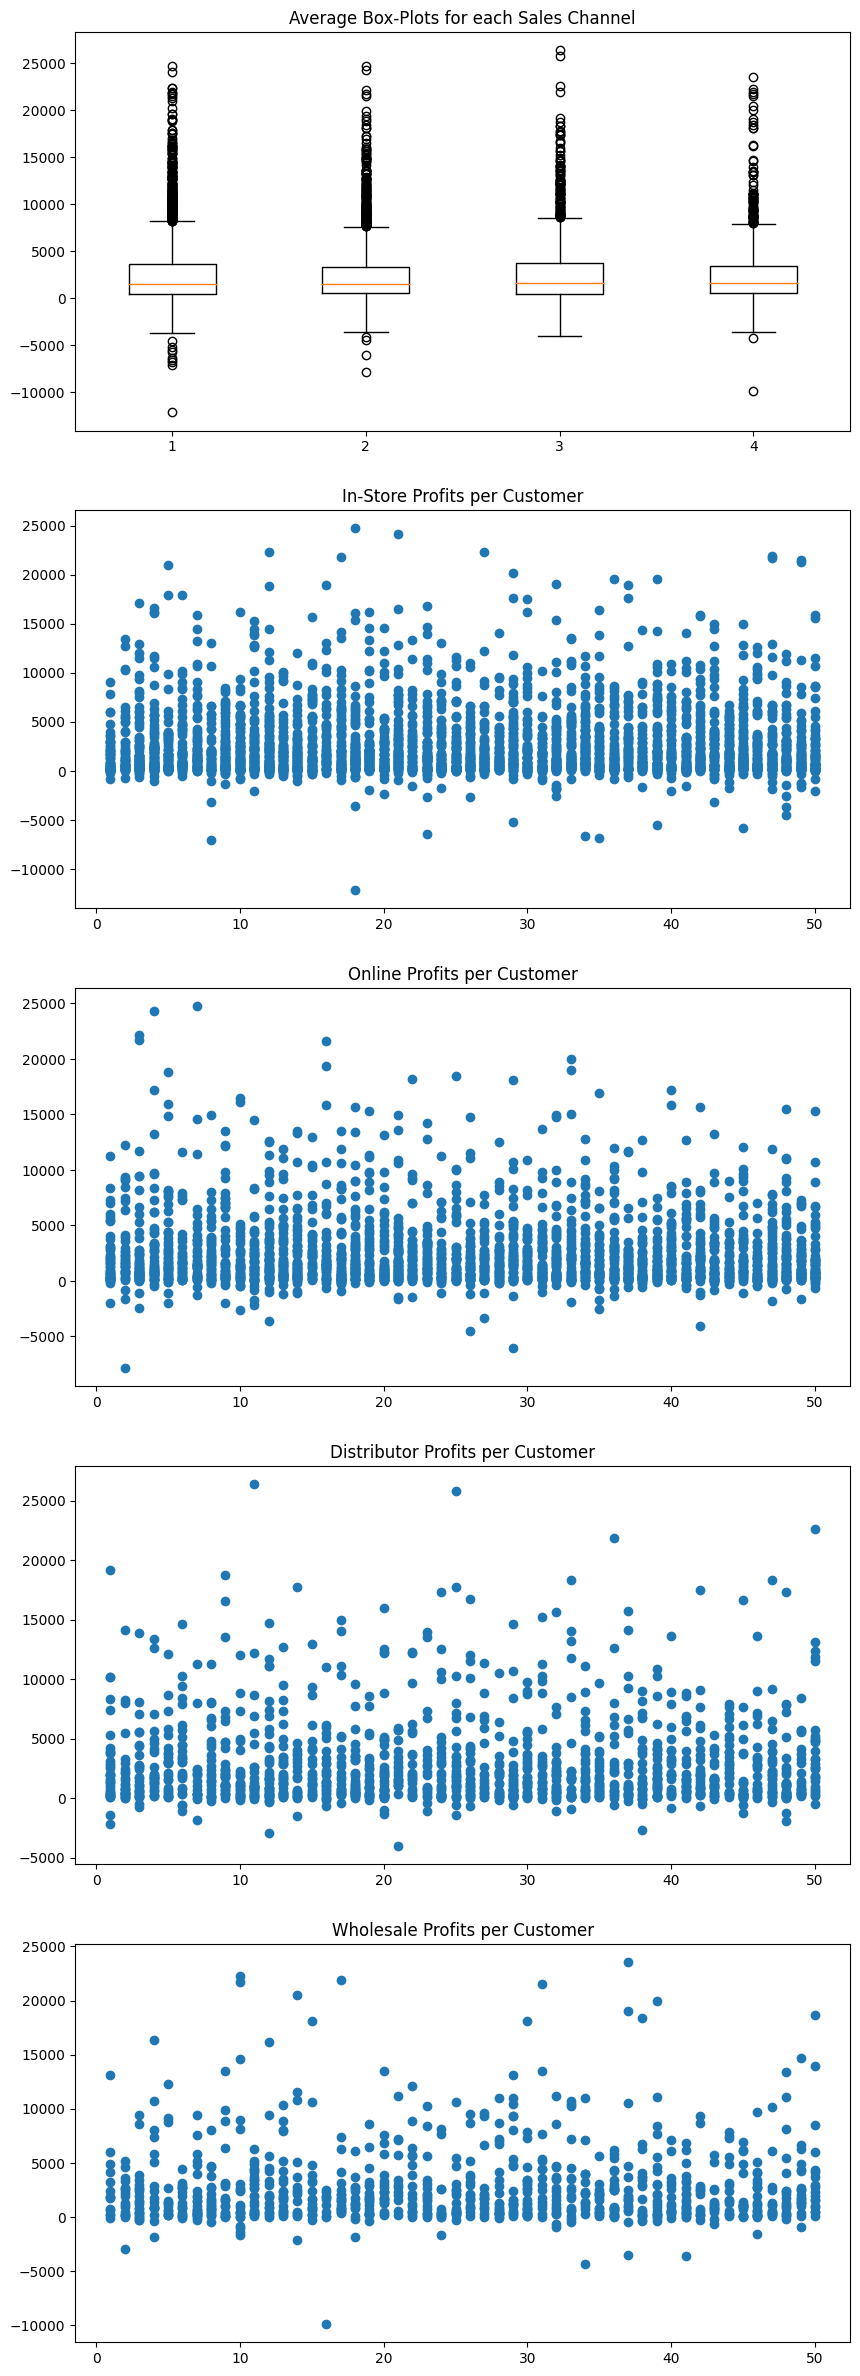

In [26]:
figs, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))


axes[0].boxplot([instore_data['Profit'], online_data['Profit'], distributor_data['Profit'], wholesale_data['Profit']])
axes[0].set_title('Average Box-Plots for each Sales Channel')
axes[1].scatter(instore_data['_CustomerID'], instore_data['Profit'])
axes[1].set_title('In-Store Profits per Customer')

axes[2].scatter(online_data['_CustomerID'], online_data['Profit'])
axes[2].set_title('Online Profits per Customer')
axes[3].scatter(distributor_data['_CustomerID'], distributor_data['Profit'])
axes[3].set_title('Distributor Profits per Customer')
axes[4].scatter(wholesale_data['_CustomerID'], wholesale_data['Profit'])
axes[4].set_title('Wholesale Profits per Customer')


In [27]:
# Basic Profit Data in numbers

print("Averages:")
print("\tIn-Store Average Profit: $%.2f" % instore_data['Profit'].mean())
print("\tOnline Average Profit: $%.2f" % online_data['Profit'].mean())
print("\tDistributor Average Profit: $%.2f" % distributor_data['Profit'].mean())
print("\tWholesale Average Profit: $%.2f" % wholesale_data['Profit'].mean())

print("\nHighest Profits:")
print("\tIn-Store Highest Profit: $%.2f" % instore_data['Profit'].max())
print("\tOnline Highest Profit: $%.2f" % online_data['Profit'].max())
print("\tDistributor Highest Profit: $%.2f" % distributor_data['Profit'].max())
print("\tWholesale Highest Profit: $%.2f" % wholesale_data['Profit'].max())

print("\nLowest Profits:")
print("\tIn-Store Lowest Profit: $%.2f" % instore_data['Profit'].min())
print("\tOnline Lowest Profit: $%.2f" % online_data['Profit'].min())
print("\tDistributor Lowest Profit: $%.2f" % distributor_data['Profit'].min())
print("\tWholesale Lowest Profit: $%.2f" % wholesale_data['Profit'].min())

Averages:
	In-Store Average Profit: $2667.63
	Online Average Profit: $2543.02
	Distributor Average Profit: $2827.56
	Wholesale Average Profit: $2769.03

Highest Profits:
	In-Store Highest Profit: $24722.18
	Online Highest Profit: $24748.16
	Distributor Highest Profit: $26384.60
	Wholesale Highest Profit: $23552.36

Lowest Profits:
	In-Store Lowest Profit: $-12167.20
	Online Lowest Profit: $-7868.42
	Distributor Lowest Profit: $-4034.31
	Wholesale Lowest Profit: $-9888.64


While in-store has the most customer frequency, it has the lowest average. However, this may be due to the density of lower profits.

The distributor average is the highest, likely due to a more scattered distribution.

It is also noted that Wholesale's profit has the lowest maximum and minimum profits, however its average is only lower than the distributor profit average.

What we can conclude from the close averages is that all the sales channels have similar profit performances outside of frequency.

In [28]:
print("instore sales teams: " + str(instore_data['_SalesTeamID'].unique()))
print("online sales teams: " + str(online_data['_SalesTeamID'].unique()))
print("distributor sales teams: " + str(distributor_data['_SalesTeamID'].unique()))
print("wholesale sales teams: " + str(wholesale_data['_SalesTeamID'].unique()))

instore sales teams: [ 6 10  4  8  9  5  2  7 11  3  1 12]
online sales teams: [14 12 18 13 19 17 15 16 20]
distributor sales teams: [21 22 23 24 20 25]
wholesale sales teams: [28 25 26 27]


The sales teams intersecting are [12, 20, 25].

Now, which sales teams have been responsible for the loss of profit in each channel?

Text(0.5, 1.0, 'Wholesale Profits per Sales Team')

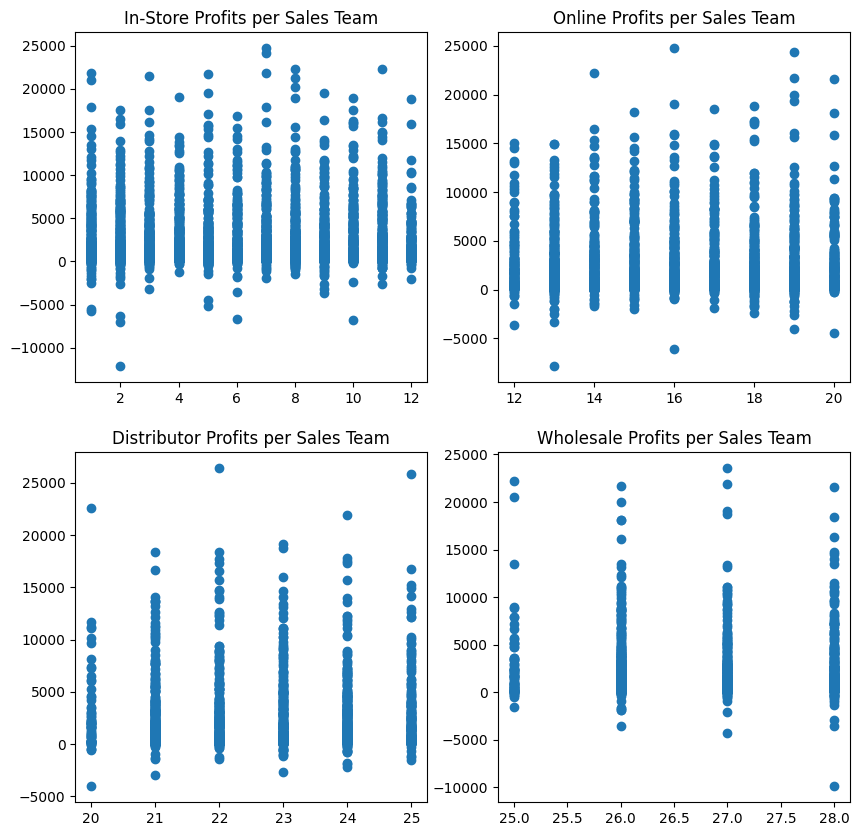

In [29]:
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


#axes[0].boxplot([instore_data['Profit'], online_data['Profit'], distributor_data['Profit'], wholesale_data['Profit']])
#axes[0].set_title('Average Box-Plots for each Sales Channel')
axes[0][0].scatter(instore_data['_SalesTeamID'], instore_data['Profit'])
axes[0][0].set_title('In-Store Profits per Sales Team')

axes[0][1].scatter(online_data['_SalesTeamID'], online_data['Profit'])
axes[0][1].set_title('Online Profits per Sales Team')
axes[1][0].scatter(distributor_data['_SalesTeamID'], distributor_data['Profit'])
axes[1][0].set_title('Distributor Profits per Sales Team')
axes[1][1].scatter(wholesale_data['_SalesTeamID'], wholesale_data['Profit'])
axes[1][1].set_title('Wholesale Profits per Sales Team')

All sales teams have had negative profits several times. Simply put, the sales team does not seem to determine success or failure in profits.

However, it may be good to analyze the sales teams with different data columns to find possible predictions of success based on which team.

#### **The following graphs show the data for negative profits.**

array([[<Axes: title={'center': 'OrderDate'}>,
        <Axes: title={'center': '_SalesTeamID'}>,
        <Axes: title={'center': '_CustomerID'}>,
        <Axes: title={'center': '_StoreID'}>],
       [<Axes: title={'center': '_ProductID'}>,
        <Axes: title={'center': 'Order Quantity'}>,
        <Axes: title={'center': 'Discount Applied'}>,
        <Axes: title={'center': 'Unit Cost'}>],
       [<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'DaysToShip'}>,
        <Axes: title={'center': 'DaysToDeliver'}>,
        <Axes: title={'center': 'Total Sales'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'OrderYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

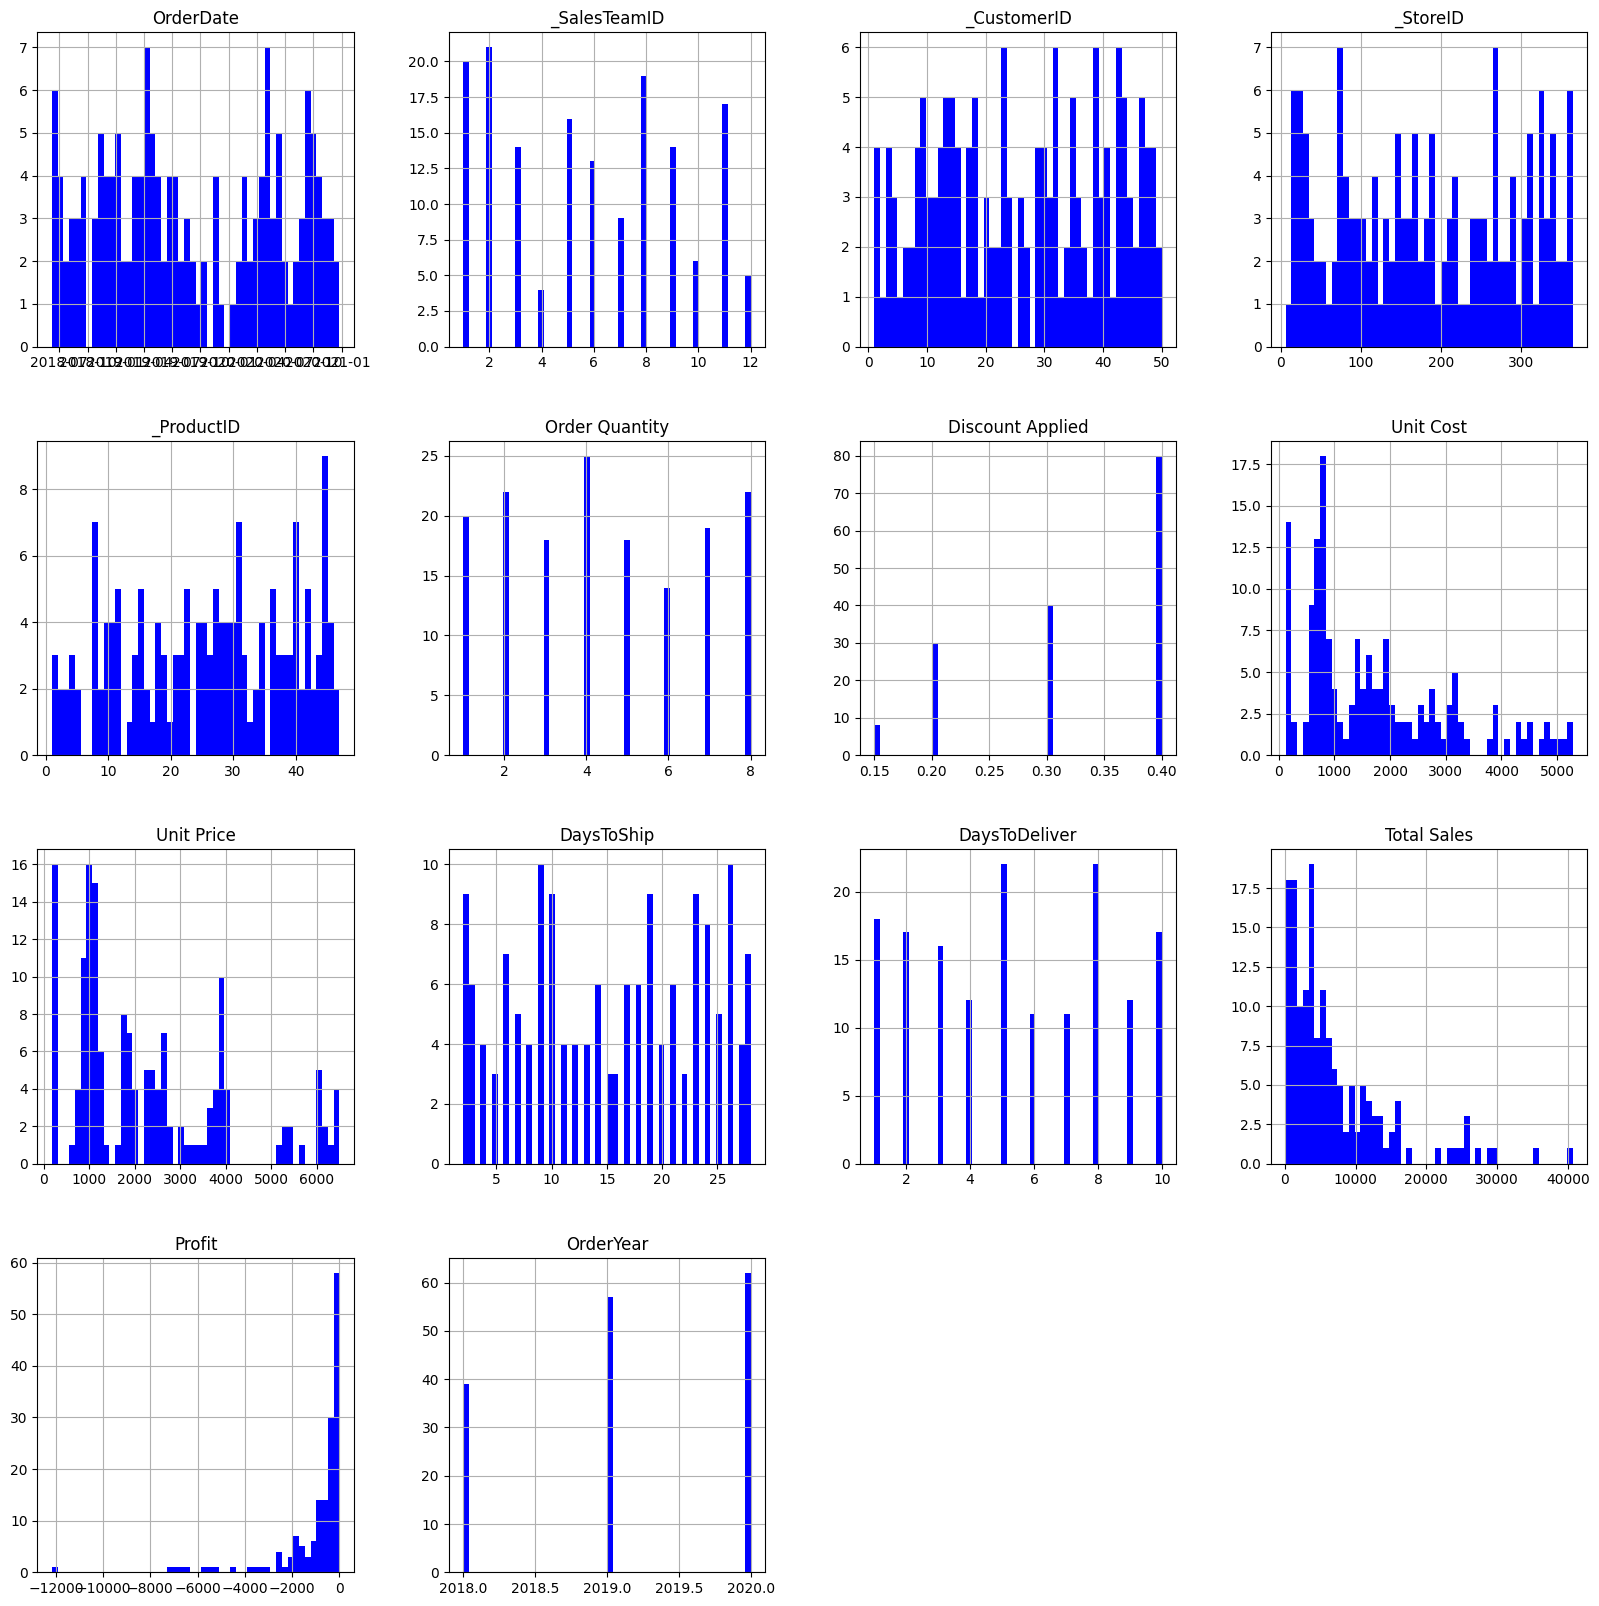

In [30]:
x_size = 20
y_size = 20

# find in-store data of negative profits

instore_data[(instore_data['Profit'] < 0)].hist(bins=50, figsize=(x_size, y_size), color='blue')

array([[<Axes: title={'center': 'OrderDate'}>,
        <Axes: title={'center': '_SalesTeamID'}>,
        <Axes: title={'center': '_CustomerID'}>,
        <Axes: title={'center': '_StoreID'}>],
       [<Axes: title={'center': '_ProductID'}>,
        <Axes: title={'center': 'Order Quantity'}>,
        <Axes: title={'center': 'Discount Applied'}>,
        <Axes: title={'center': 'Unit Cost'}>],
       [<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'DaysToShip'}>,
        <Axes: title={'center': 'DaysToDeliver'}>,
        <Axes: title={'center': 'Total Sales'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'OrderYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

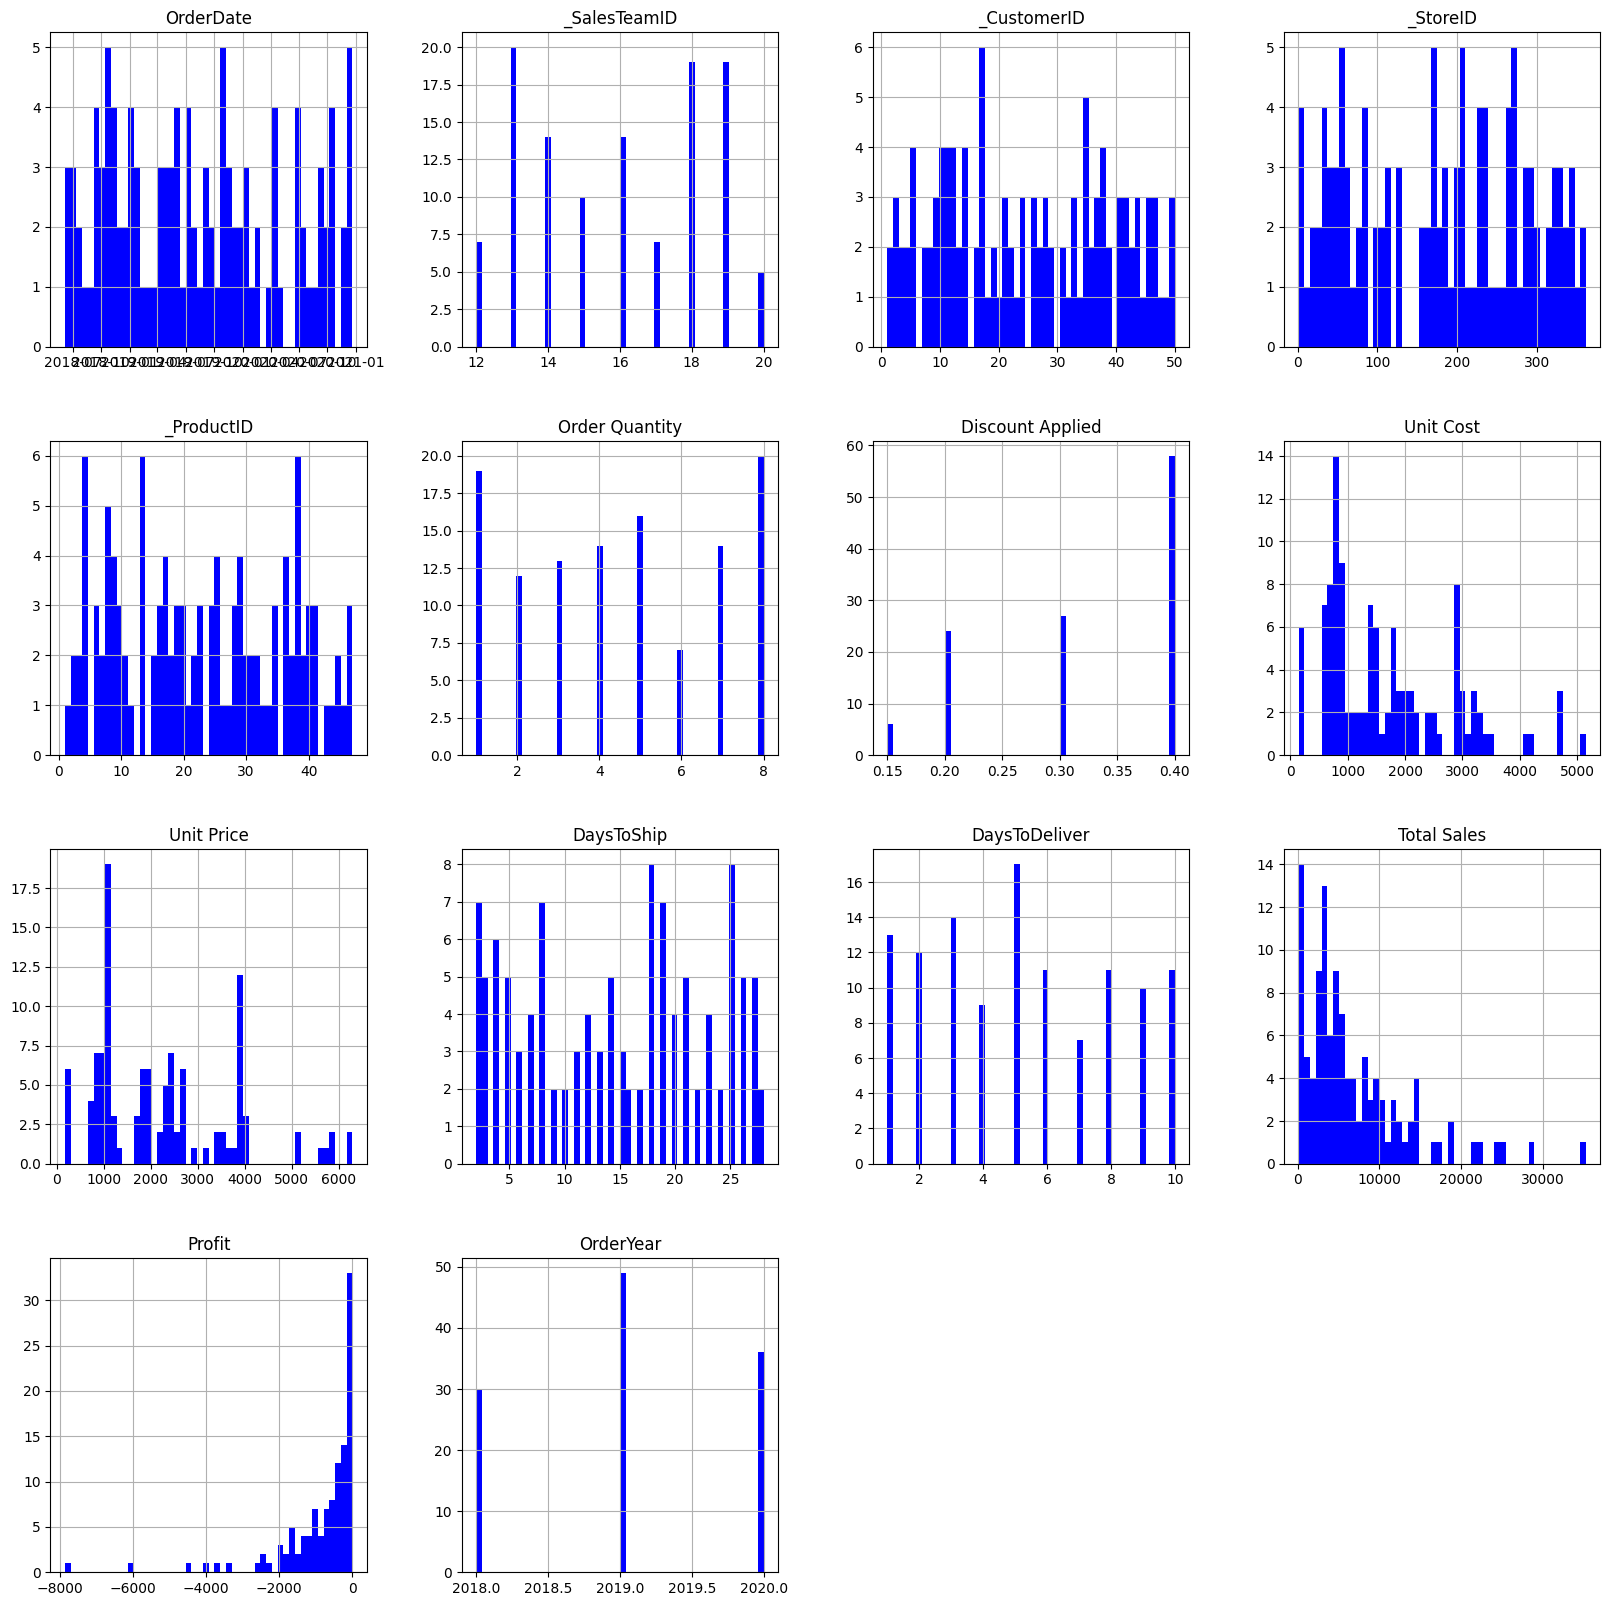

In [31]:
# find online data of negative profits
online_data[(online_data['Profit'] < 0)].hist(bins=50, figsize=(x_size, y_size), color='blue')

array([[<Axes: title={'center': 'OrderDate'}>,
        <Axes: title={'center': '_SalesTeamID'}>,
        <Axes: title={'center': '_CustomerID'}>,
        <Axes: title={'center': '_StoreID'}>],
       [<Axes: title={'center': '_ProductID'}>,
        <Axes: title={'center': 'Order Quantity'}>,
        <Axes: title={'center': 'Discount Applied'}>,
        <Axes: title={'center': 'Unit Cost'}>],
       [<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'DaysToShip'}>,
        <Axes: title={'center': 'DaysToDeliver'}>,
        <Axes: title={'center': 'Total Sales'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'OrderYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

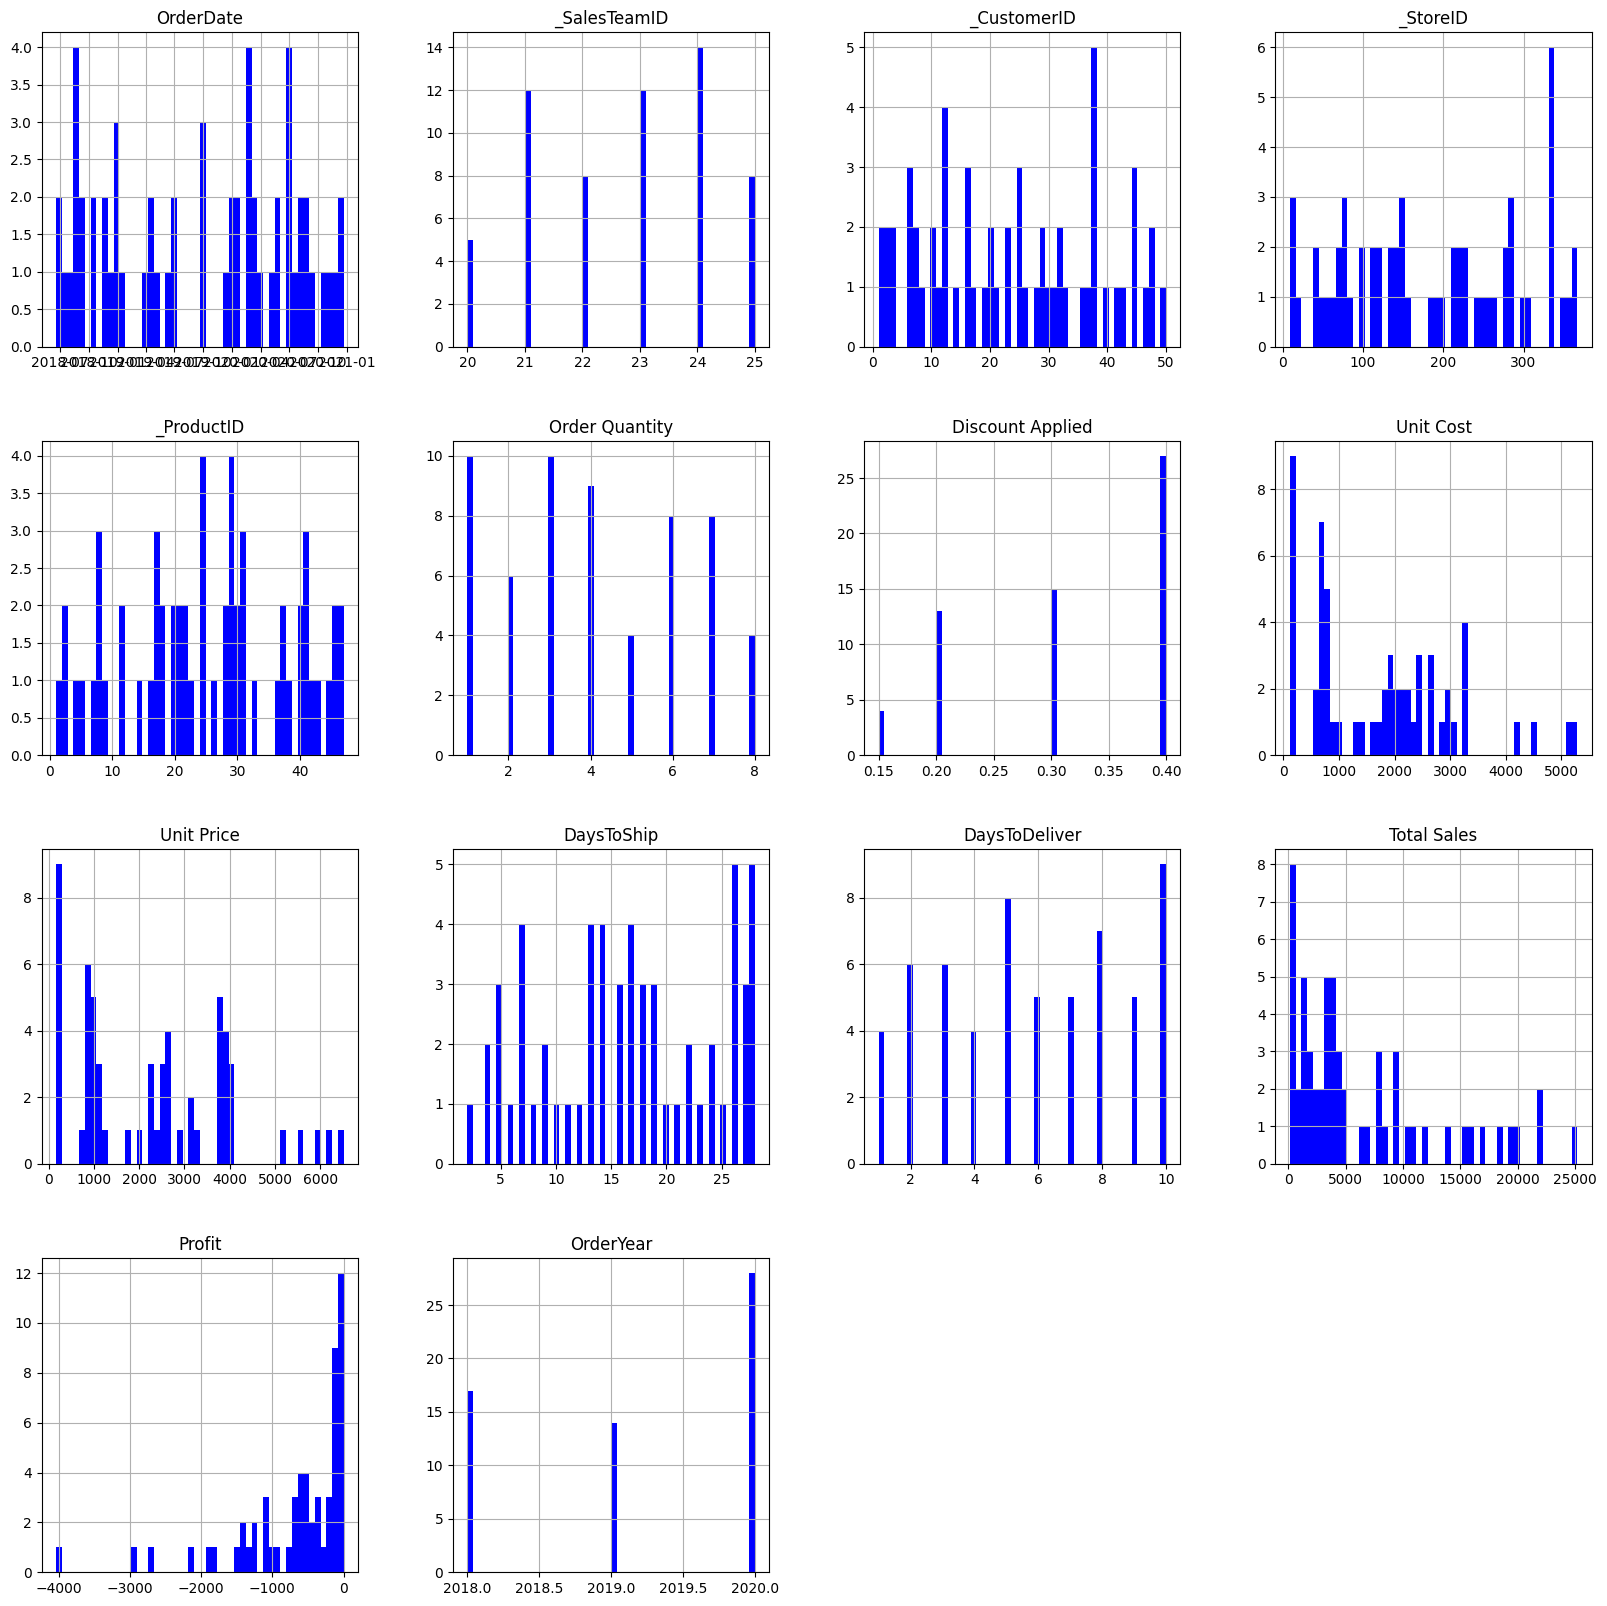

In [32]:
# find distributor data of negative profits
distributor_data[(distributor_data['Profit'] < 0)].hist(bins=50, figsize=(x_size, y_size), color='blue')

array([[<Axes: title={'center': 'OrderDate'}>,
        <Axes: title={'center': '_SalesTeamID'}>,
        <Axes: title={'center': '_CustomerID'}>,
        <Axes: title={'center': '_StoreID'}>],
       [<Axes: title={'center': '_ProductID'}>,
        <Axes: title={'center': 'Order Quantity'}>,
        <Axes: title={'center': 'Discount Applied'}>,
        <Axes: title={'center': 'Unit Cost'}>],
       [<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'DaysToShip'}>,
        <Axes: title={'center': 'DaysToDeliver'}>,
        <Axes: title={'center': 'Total Sales'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'OrderYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

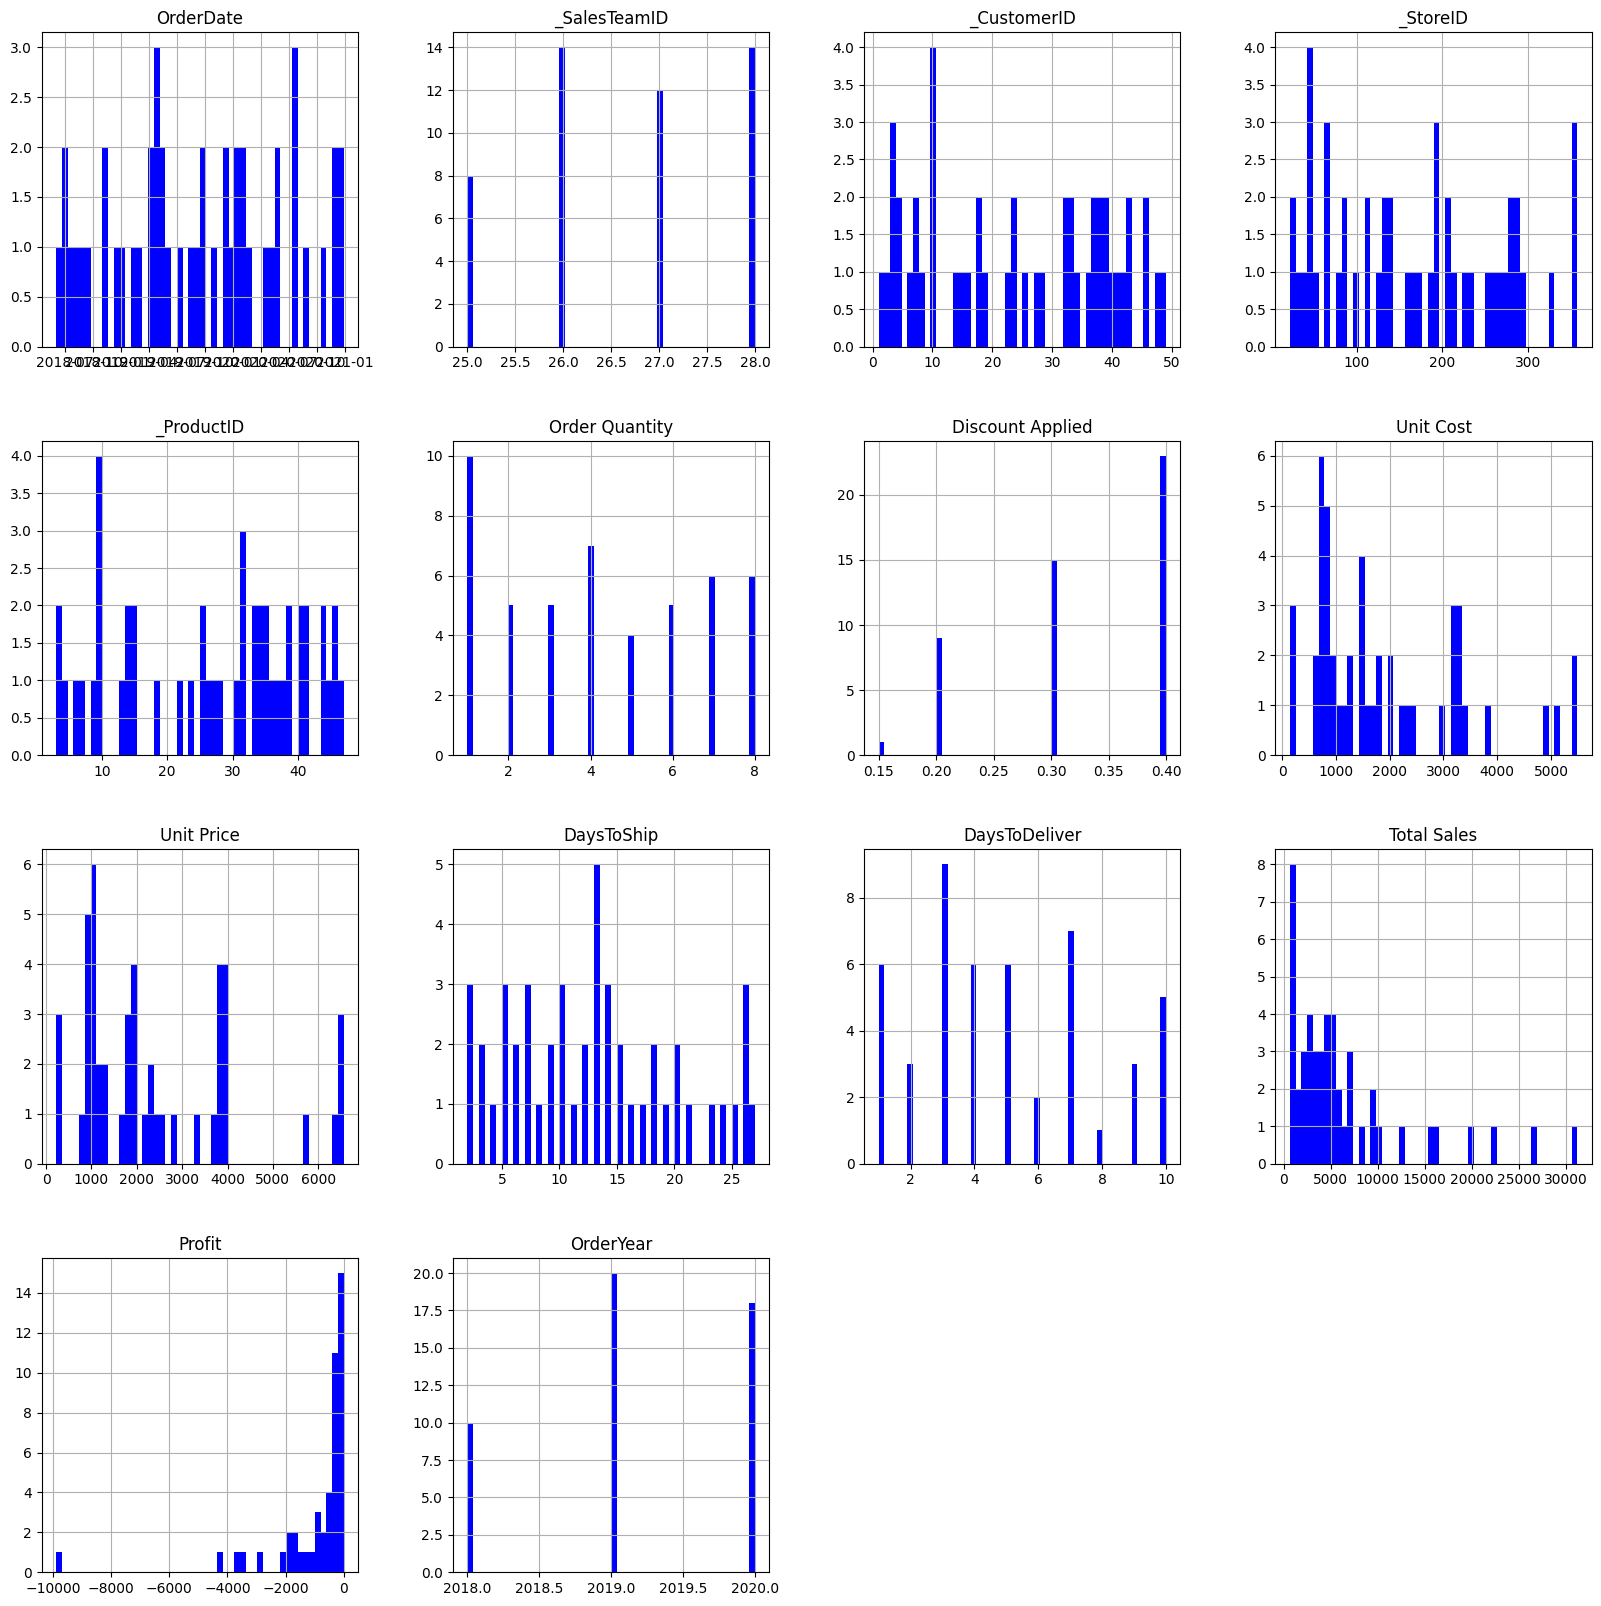

In [33]:
# find wholesale data of negative profits
wholesale_data[(wholesale_data['Profit'] < 0)].hist(bins=50, figsize=(x_size, y_size), color='blue')

In [34]:
discount_sales = us_sales_data.groupby('Discount Applied')['Total Sales'].sum().reset_index()
print(discount_sales)

   Discount Applied   Total Sales
0             0.050  2.304220e+07
1             0.075  1.975717e+07
2             0.100  1.204392e+07
3             0.150  7.985620e+06
4             0.200  5.540879e+06
5             0.300  2.437604e+06
6             0.400  2.335978e+06


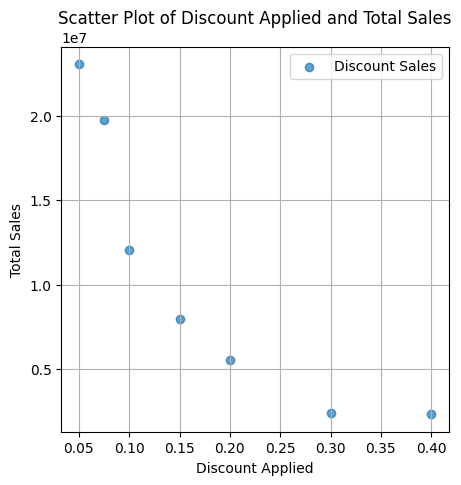

In [35]:
# Displaying the total sales for each discount level
plt.figure(figsize=(5,5))  
plt.scatter(discount_sales['Discount Applied'], discount_sales['Total Sales'], label='Discount Sales', alpha=0.7)

# Add labels and title
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Discount Applied and Total Sales')
plt.legend()
plt.grid(True)
plt.show()

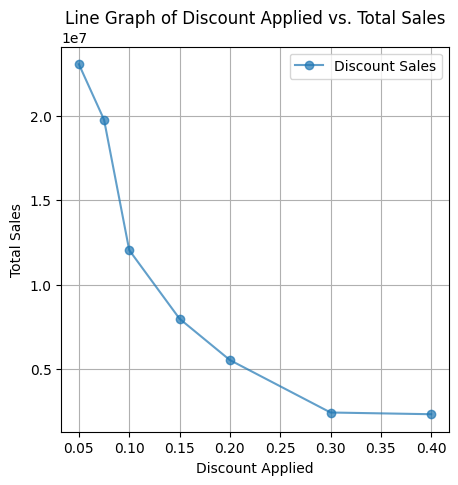

In [36]:
plt.figure(figsize=(5, 5))  

plt.plot(discount_sales['Discount Applied'], discount_sales['Total Sales'], marker='o', linestyle='-', label='Discount Sales', alpha=0.7)
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Line Graph of Discount Applied vs. Total Sales')
plt.legend()
plt.grid(True)
plt.show()

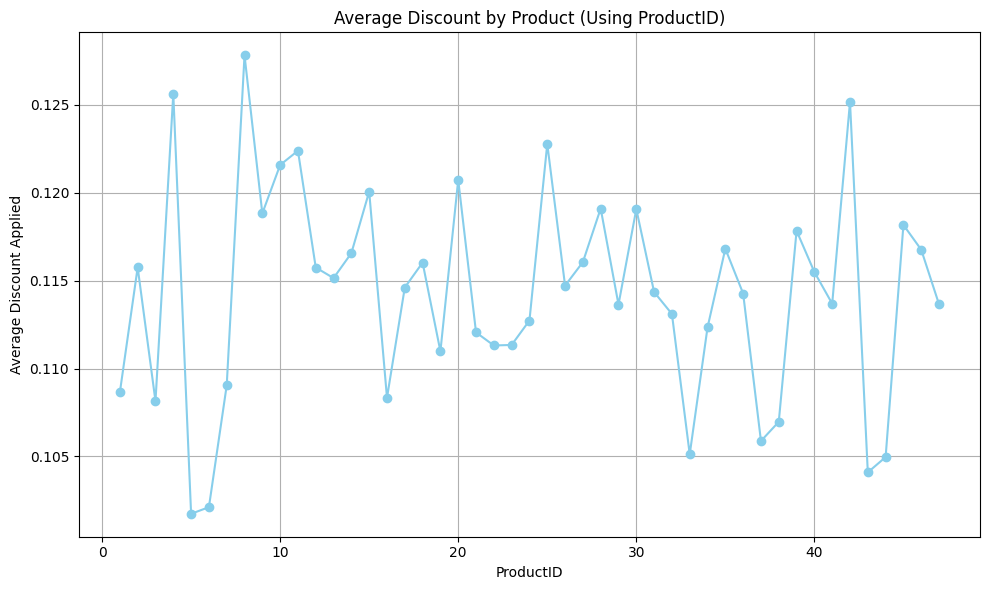

In [37]:
average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()
plt.figure(figsize=(10, 6))
average_discount_by_product.plot(kind='line', marker='o', color='skyblue')

plt.title('Average Discount by Product (Using ProductID)')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()

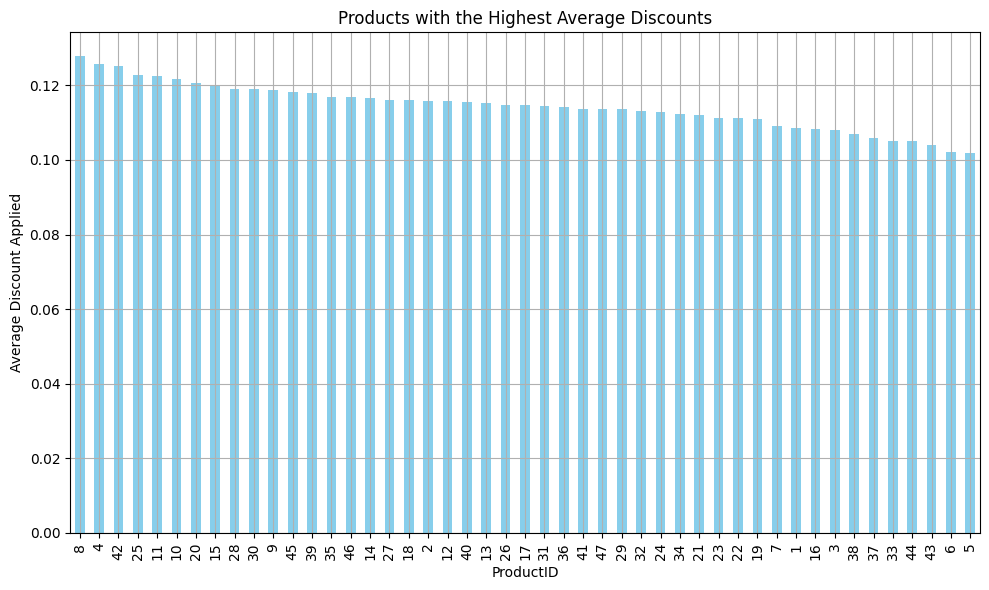

In [38]:
average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()

sorted_products = average_discount_by_product.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_products.plot(kind='bar', color='skyblue')

plt.title('Products with the Highest Average Discounts')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')

plt.grid(True)
plt.tight_layout()
plt.show()

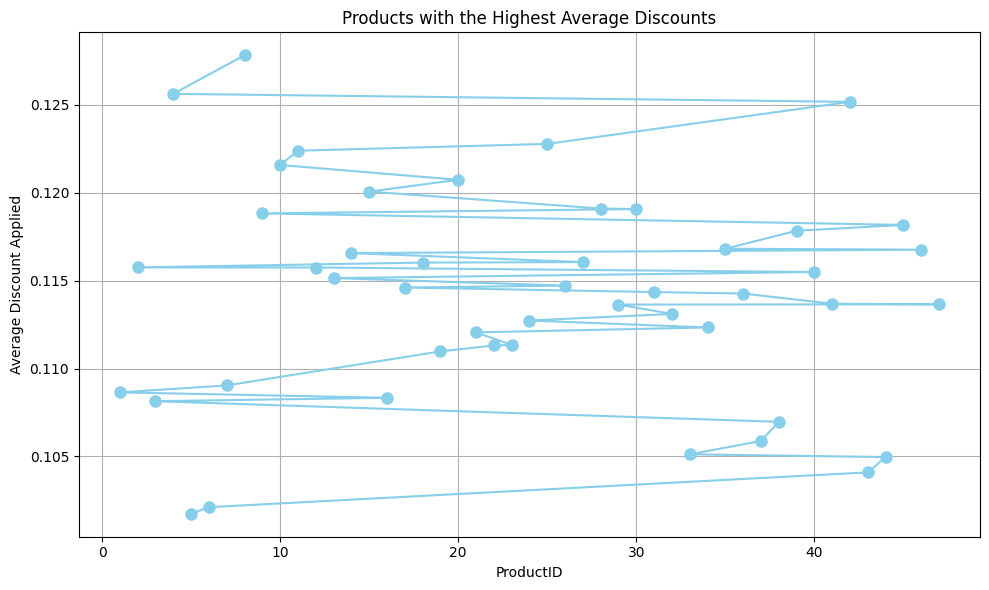

In [39]:
average_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].mean()
sorted_products = average_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(sorted_products.index, sorted_products.values, marker='o', color='skyblue', linestyle='-', markersize=8)
plt.title('Products with the Highest Average Discounts')
plt.xlabel('ProductID')
plt.ylabel('Average Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()

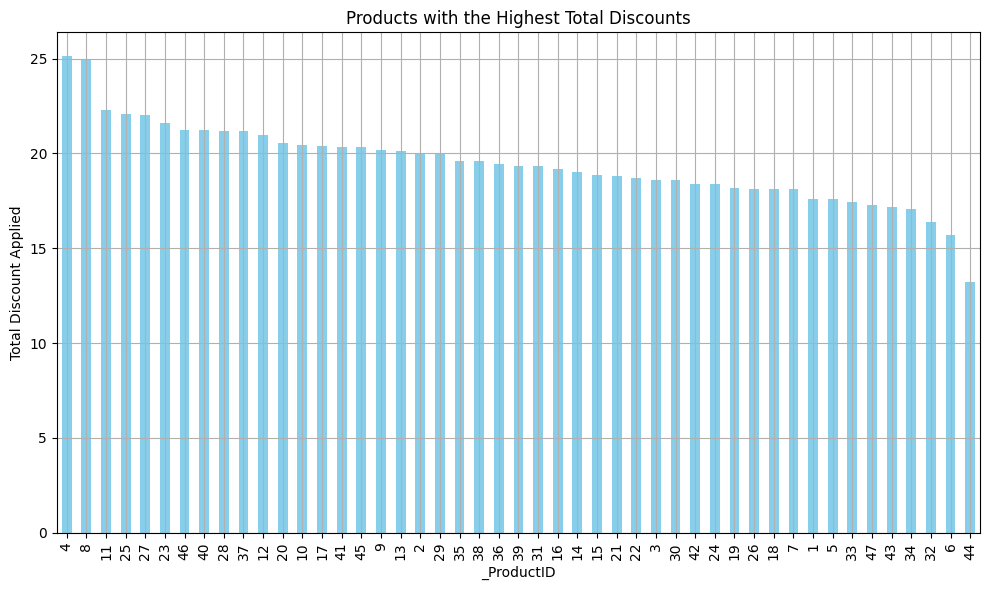

In [40]:
total_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].sum()
sorted_products = total_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_products.plot(kind='bar', color='skyblue')
plt.title('Products with the Highest Total Discounts')
plt.xlabel('_ProductID')
plt.ylabel('Total Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()

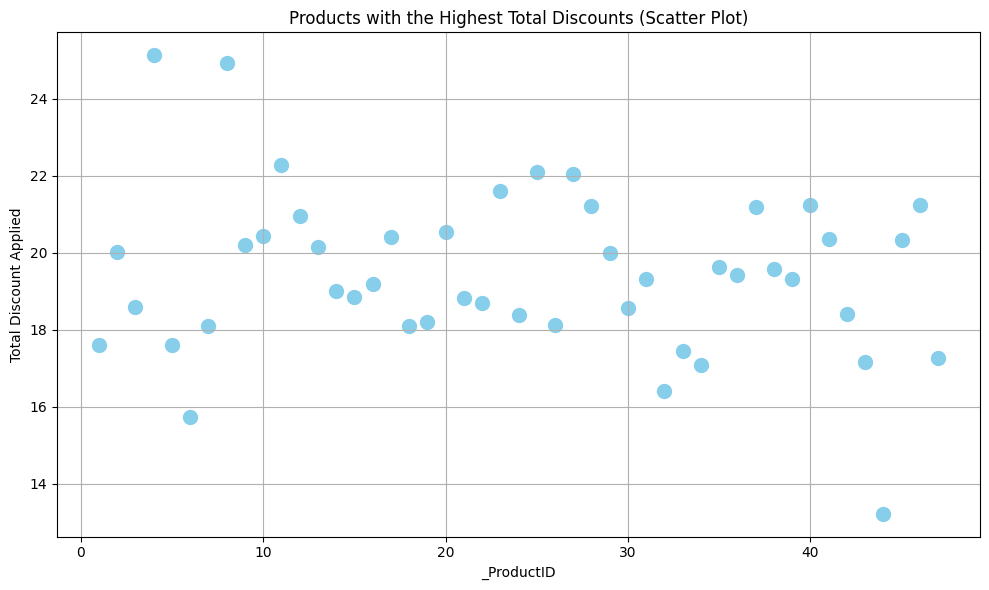

In [41]:
total_discount_by_product = us_sales_data.groupby('_ProductID')['Discount Applied'].sum()
sorted_products = total_discount_by_product.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(sorted_products.index, sorted_products.values, color='skyblue', s=100)
plt.title('Products with the Highest Total Discounts (Scatter Plot)')
plt.xlabel('_ProductID')
plt.ylabel('Total Discount Applied')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
#Removing Redundant Columns
us_sales_data = us_sales_data.drop(labels = ['OrderDate', 'ShipDate', 'DeliveryDate'], axis=1)
us_sales_data

OrderNumber Sales Channel WarehouseCode ProcuredDate CurrencyCode   
0      SO - 000101      In-Store  WARE-UHY1004     31/12/17          USD  \
1      SO - 000102        Online  WARE-NMK1003     31/12/17          USD   
2      SO - 000103   Distributor  WARE-UHY1004     31/12/17          USD   
3      SO - 000104     Wholesale  WARE-NMK1003     31/12/17          USD   
4      SO - 000105   Distributor  WARE-NMK1003      10/4/18          USD   
...            ...           ...           ...          ...          ...   
7986  SO - 0008087      In-Store  WARE-MKL1006      26/9/20          USD   
7987  SO - 0008088        Online  WARE-NMK1003      26/9/20          USD   
7988  SO - 0008089        Online  WARE-UHY1004      26/9/20          USD   
7989  SO - 0008090        Online  WARE-NMK1003      26/9/20          USD   
7990  SO - 0008091      In-Store  WARE-UHY1004      26/9/20          USD   

      _SalesTeamID  _CustomerID  _StoreID  _ProductID  Order Quantity   
0                6           15       259          12               5  \
1               14           20       196          27               3   
2               21           16       213          16               1   
3               28           48       107          23               8   
4               22           49       111          26               8   
...            ...          ...       ...         ...             ...   
7986             9           41       339          29               1   
7987            14           29       202           3               6   
7988            14           32       241          35               5   
7989            20           42       112          36               8   
7990             6           41       237          43               5   

      Discount Applied  Unit Cost  Unit Price  DaysToShip  DaysToDeliver   
0                0.075    1001.18      1963.1        14.0            5.0  \
1                0.075    3348.66      3939.6        22.0           10.0   
2                0.050     781.22      1775.5        21.0           10.0   
3                0.075    1464.69      2324.9         2.0            5.0   
4                0.100    1476.14      1822.4        16.0           10.0   
...                ...        ...         ...         ...            ...   
7986             0.075     121.94       234.5         8.0            7.0   
7987             0.050    1921.56      3202.6         3.0            2.0   
7988             0.200    2792.76      3825.7        24.0            3.0   
7989             0.100     804.00      1072.0        21.0            5.0   
7990             0.075    1370.82      2211.0        14.0            6.0   

      Total Sales     Profit  OrderYear  
0       9079.3375  4073.4375       2018  
1      10932.3900   886.4100       2018  
2       1686.7250   905.5050       2018  
3      17204.2600  5486.7400       2018  
4      13121.2800  1312.1600       2018  
...           ...        ...        ...  
7986     216.9125    94.9725       2020  
7987   18254.8200  6725.4600       2020  
7988   15302.8000  1339.0000       2020  
7989    7718.4000  1286.4000       2020  
7990   10225.8750  3371.7750       2020  

[7991 rows x 18 columns]

In [43]:
# Checking Uniqueness of data in all columns
for column in us_sales_data:
    if column not in ['OrderDate', 'ShipDate', 'DeliveryDate']:
        print(column, len(us_sales_data[column].unique()))

OrderNumber 7991
Sales Channel 4
WarehouseCode 6
ProcuredDate 11
CurrencyCode 1
_SalesTeamID 28
_CustomerID 50
_StoreID 367
_ProductID 47
Order Quantity 8
Discount Applied 7
Unit Cost 5252
Unit Price 664
DaysToShip 27
DaysToDeliver 10
Total Sales 5032
Profit 7693
OrderYear 3


In [44]:
# Removing Columns that doesnot affect our target
us_sales_data = us_sales_data.drop(labels = ['OrderNumber', 'ProcuredDate', 'CurrencyCode'], axis=1)

# Encoding String Values to Numeric Values

In [45]:
us_sales_data['Sales Channel'], unique_sales_channels = pd.factorize(us_sales_data['Sales Channel'])
us_sales_data['WarehouseCode'], unique_warehouse_codes = pd.factorize(us_sales_data['WarehouseCode'])
us_sales_data

Sales Channel  WarehouseCode  _SalesTeamID  _CustomerID  _StoreID   
0                 0              0             6           15       259  \
1                 1              1            14           20       196   
2                 2              0            21           16       213   
3                 3              1            28           48       107   
4                 2              1            22           49       111   
...             ...            ...           ...          ...       ...   
7986              0              4             9           41       339   
7987              1              1            14           29       202   
7988              1              0            14           32       241   
7989              1              1            20           42       112   
7990              0              0             6           41       237   

      _ProductID  Order Quantity  Discount Applied  Unit Cost  Unit Price   
0             12               5             0.075    1001.18      1963.1  \
1             27               3             0.075    3348.66      3939.6   
2             16               1             0.050     781.22      1775.5   
3             23               8             0.075    1464.69      2324.9   
4             26               8             0.100    1476.14      1822.4   
...          ...             ...               ...        ...         ...   
7986          29               1             0.075     121.94       234.5   
7987           3               6             0.050    1921.56      3202.6   
7988          35               5             0.200    2792.76      3825.7   
7989          36               8             0.100     804.00      1072.0   
7990          43               5             0.075    1370.82      2211.0   

      DaysToShip  DaysToDeliver  Total Sales     Profit  OrderYear  
0           14.0            5.0    9079.3375  4073.4375       2018  
1           22.0           10.0   10932.3900   886.4100       2018  
2           21.0           10.0    1686.7250   905.5050       2018  
3            2.0            5.0   17204.2600  5486.7400       2018  
4           16.0           10.0   13121.2800  1312.1600       2018  
...          ...            ...          ...        ...        ...  
7986         8.0            7.0     216.9125    94.9725       2020  
7987         3.0            2.0   18254.8200  6725.4600       2020  
7988        24.0            3.0   15302.8000  1339.0000       2020  
7989        21.0            5.0    7718.4000  1286.4000       2020  
7990        14.0            6.0   10225.8750  3371.7750       2020  

[7991 rows x 15 columns]

# Removing Outliers

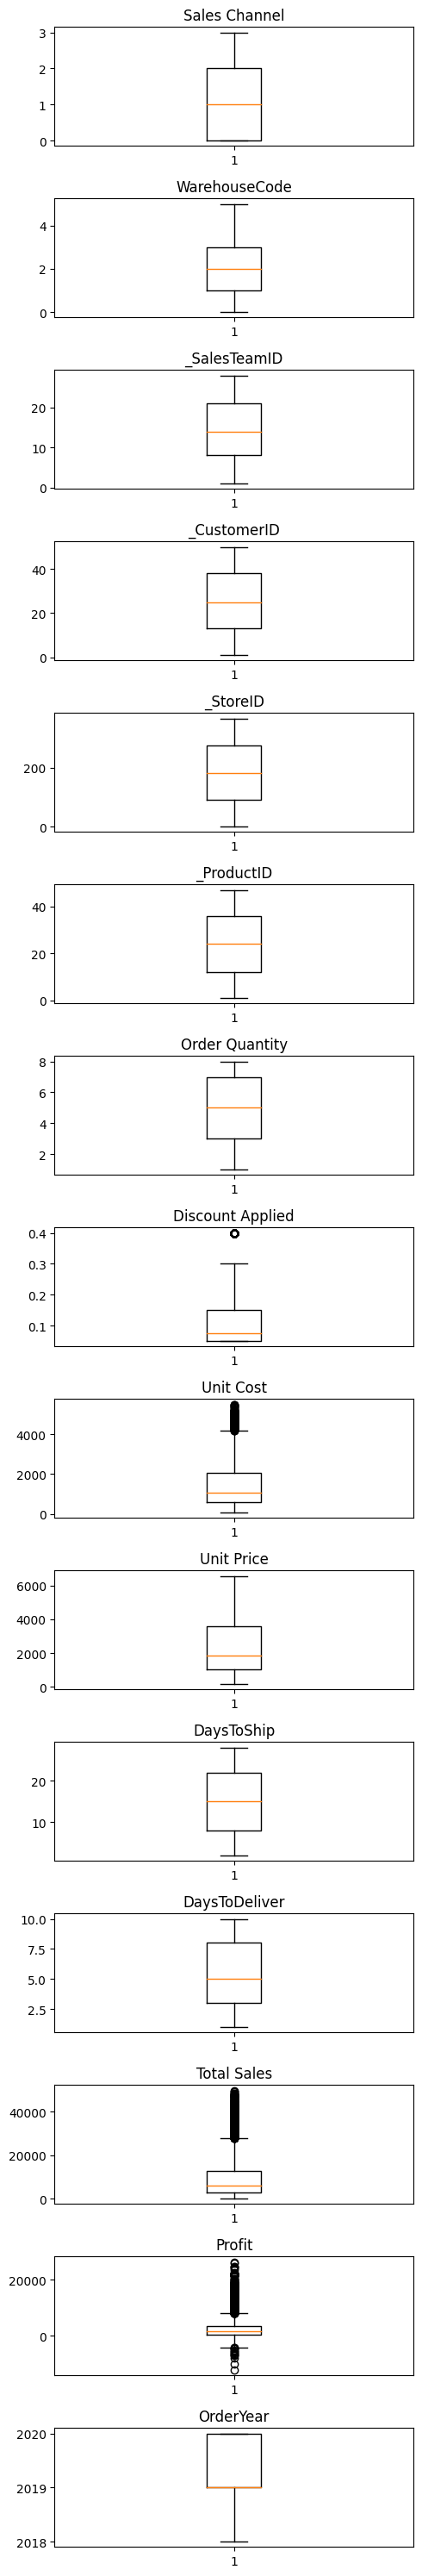

In [46]:
fig, ax = plt.subplots(15, 1, figsize=(5, 30))
for i in range(len(us_sales_data.columns)):
    ax[i].boxplot(us_sales_data.iloc[:,i])
    ax[i].set_title(us_sales_data.columns[i])
fig.tight_layout()

In [47]:
# Removing Outliers
Q1 = us_sales_data.quantile(0.25)
Q3 = us_sales_data.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for the outliers
outlier_mask = (us_sales_data < (Q1 - 1.5 * IQR)) | (us_sales_data > (Q3 + 1.5 * IQR))

# Apply the mask to remove outliers
us_sales_data = us_sales_data[~outlier_mask.any(axis=1)]

us_sales_data

Sales Channel  WarehouseCode  _SalesTeamID  _CustomerID  _StoreID   
0                 0              0             6           15       259  \
1                 1              1            14           20       196   
2                 2              0            21           16       213   
3                 3              1            28           48       107   
4                 2              1            22           49       111   
...             ...            ...           ...          ...       ...   
7986              0              4             9           41       339   
7987              1              1            14           29       202   
7988              1              0            14           32       241   
7989              1              1            20           42       112   
7990              0              0             6           41       237   

      _ProductID  Order Quantity  Discount Applied  Unit Cost  Unit Price   
0             12               5             0.075    1001.18      1963.1  \
1             27               3             0.075    3348.66      3939.6   
2             16               1             0.050     781.22      1775.5   
3             23               8             0.075    1464.69      2324.9   
4             26               8             0.100    1476.14      1822.4   
...          ...             ...               ...        ...         ...   
7986          29               1             0.075     121.94       234.5   
7987           3               6             0.050    1921.56      3202.6   
7988          35               5             0.200    2792.76      3825.7   
7989          36               8             0.100     804.00      1072.0   
7990          43               5             0.075    1370.82      2211.0   

      DaysToShip  DaysToDeliver  Total Sales     Profit  OrderYear  
0           14.0            5.0    9079.3375  4073.4375       2018  
1           22.0           10.0   10932.3900   886.4100       2018  
2           21.0           10.0    1686.7250   905.5050       2018  
3            2.0            5.0   17204.2600  5486.7400       2018  
4           16.0           10.0   13121.2800  1312.1600       2018  
...          ...            ...          ...        ...        ...  
7986         8.0            7.0     216.9125    94.9725       2020  
7987         3.0            2.0   18254.8200  6725.4600       2020  
7988        24.0            3.0   15302.8000  1339.0000       2020  
7989        21.0            5.0    7718.4000  1286.4000       2020  
7990        14.0            6.0   10225.8750  3371.7750       2020  

[6756 rows x 15 columns]

# Correlation Matrix

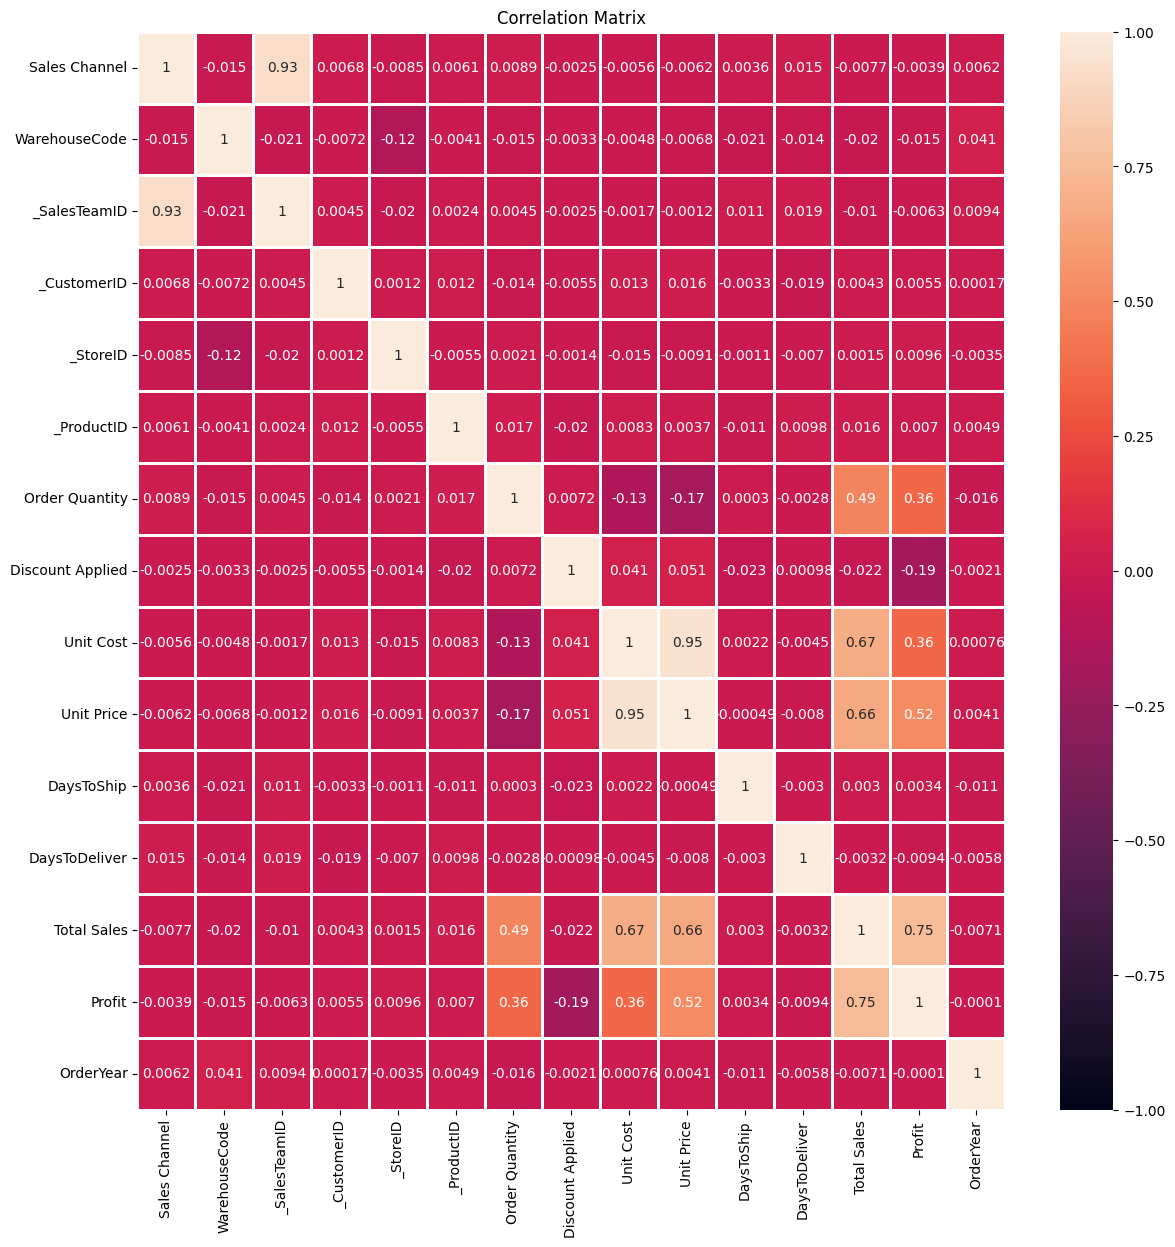

In [48]:
corr_matrix = us_sales_data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidth = 1)
plt.title("Correlation Matrix")
plt.show()

# Standarize Data

In [49]:
def standardize(column):
  return (column - column.mean()) / column.std()
std_us_sales = us_sales_data.apply(standardize, axis=0)

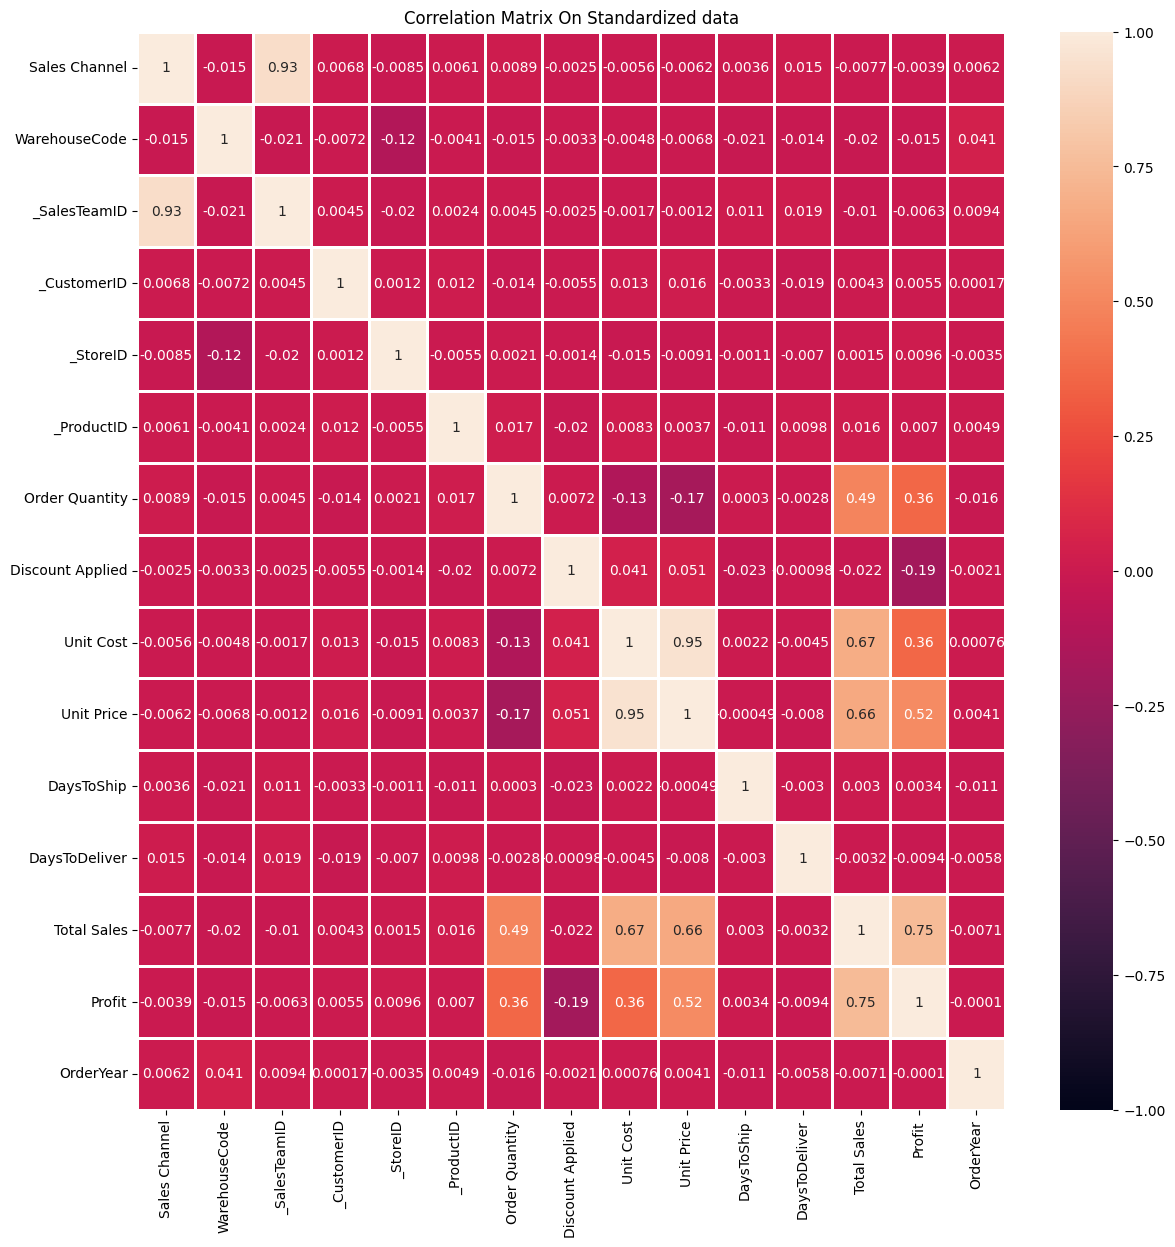

In [50]:
corr_matrix = std_us_sales.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidth = 1)
plt.title("Correlation Matrix On Standardized data")
plt.show()

# Train-Test Split

In [56]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Dropping Target Column from input data.
X = std_us_sales.drop(['Sales Channel'], axis=1)

#Selecting Target Column.
y = us_sales_data['Sales Channel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Selection

In [57]:
# Define the number of features (k) you want to select
k = 4

# Create SelectKBest instance with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your training data
X_train_selected = selector.fit(X_train, y_train)
# Get the indices of the selected features
selected_feature_indices = X_train_selected.get_support()

# Get the original column names of the selected features
selected_column_names = list(X_train.columns[selected_feature_indices])
print(f"Selected Features: {selected_column_names}")

Selected Features: ['_SalesTeamID', '_StoreID', 'Unit Price', 'DaysToDeliver']


In [58]:
#Updating train and test input data with selected columns
X_train = X_train[selected_column_names]
X_test = X_test[selected_column_names]

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

#Compute the accuracy_score
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy Score:", accuracy)



Accuracy Score: 0.9637573964497042


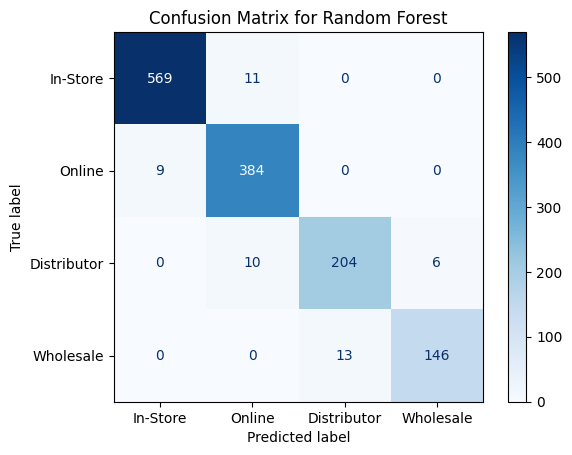

In [60]:
# Compute the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, rf_y_pred)

# Create a ConfusionMatrixDisplay object and display the confusion matrix
display_labels = ["In-Store", "Online", "Distributor", "Wholesale"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')  # You can customize the colormap and format as needed
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Decision Tree

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree classifier with the best hyperparameters
clf = DecisionTreeClassifier(**best_params)

# Make predictions on the data
clf.fit(X_train, y_train)
dt_y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = np.mean(dt_y_pred == y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9674556213017751


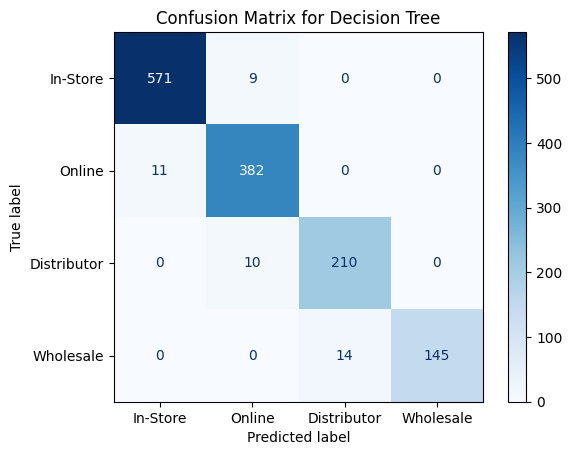

In [62]:
# Compute the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, dt_y_pred)

# Create a ConfusionMatrixDisplay object and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')  # You can customize the colormap and format as needed
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# K Nearest Neighbors(KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
k_values = list(range(1, 51))
k_final = 0
final_accuracy = 0

n_folds = 10
# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for k in k_values:
    cv_scores = []
    
    for train_index, test_index in kf.split(X_train):
        # Split the data into training and validation sets for this fold
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Create a k-NN classifier with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)
    
        # Train the k-NN classifier on the training set
        knn.fit(X_train_fold, y_train_fold)
    
        # Evaluate the k-NN classifier on the validation set
        cv_scores.append(knn.score(X_test_fold, y_test_fold))
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = np.mean(cv_scores)
    
    # Update the best k and best accuracy if a better k is found
    if mean_accuracy > final_accuracy:
        k_final = k
        final_accuracy = mean_accuracy

# Train the best k-NN classifier on the full training data
best_knn = KNeighborsClassifier(n_neighbors=k_final)
best_knn.fit(X_train, y_train)
knn_y_pred = best_knn.predict(X_test)

# Evaluate the best k-NN classifier on the test set
final_accuracy = best_knn.score(X_test, y_test)
print(f"Best K value is: {k_final}")
print(f"Best accuracy using {n_folds}-fold cross-validation with {k_final}-k value: {final_accuracy}")

Best K value is: 13
Best accuracy using 10-fold cross-validation with 13-k value: 0.9112426035502958


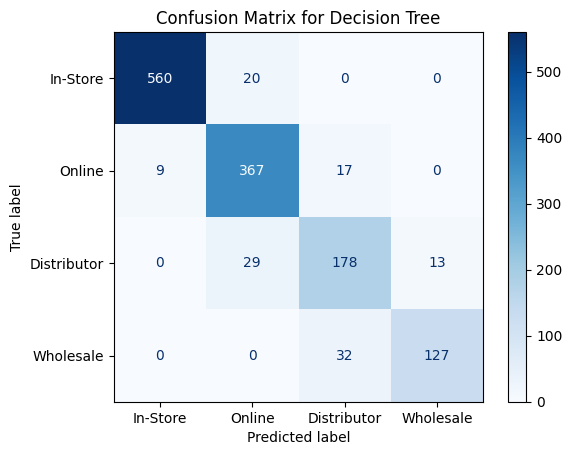

In [64]:
# Compute the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, knn_y_pred)

# Create a ConfusionMatrixDisplay object and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')  # You can customize the colormap and format as needed
plt.title('Confusion Matrix for Decision Tree')
plt.show()